`# Importing Libraries`
***

In [6]:
## Libraries to store data and perform calculations
import numpy as np
import pandas as pd

## Libraries for Visulaization
from tabulate import tabulate

`# Loading the splited csv dataframes and concaticating as ONE`
***

In [7]:
df1 = pd.read_csv("csvs/1.csv", low_memory=False)
df2 = pd.read_csv("csvs/2.csv", low_memory=False)
df3 = pd.read_csv("csvs/3.csv", low_memory=False)
df4 = pd.read_csv("csvs/4.csv", low_memory=False)
df5 = pd.read_csv("csvs/5.csv", low_memory=False)

In [8]:
# Read the dataset & Combine all the dataframes into one
ds = pd.concat([df1, df2, df3, df4, df5])

# Print the first 5 rows of the dataset
print(ds.head())

   Unnamed: 0           Time Stamp       Code                    Event ID   
0           0  2022-12-03 10:04:59  DDV1_HTTP   1DMCVIS7EJYGWLZK8E1IVEHK7  \
1           1  2022-12-03 10:04:59  DDV1_HTTP  1N0ZBFXCQLC9D1CYP3LZ4DJ77C   
2           2  2022-12-03 10:04:59  DDV1_HTTP    X3RIHMV1ZEQ134P688O1EK3J   
3           3  2022-12-03 10:05:00  DDV1_HTTP   1HFUT7IBU0HDX1SM3BH8C34K4   
4           4  2022-12-03 10:05:00  DDV1_HTTP   OT7HRQFV00EY110WGEKTB1T12   

  Message Code                  Event ID.1                  Event Time   
0    DDV1_HTTP   1DMCVIS7EJYGWLZK8E1IVEHK7  2022-12-03T10:04:53.625622  \
1    DDV1_HTTP  1N0ZBFXCQLC9D1CYP3LZ4DJ77C  2022-12-03T10:04:54.028487   
2    DDV1_HTTP    X3RIHMV1ZEQ134P688O1EK3J  2022-12-03T10:04:54.430345   
3    DDV1_HTTP   1HFUT7IBU0HDX1SM3BH8C34K4  2022-12-03T10:04:43.379629   
4    DDV1_HTTP   OT7HRQFV00EY110WGEKTB1T12  2022-12-03T10:04:44.224393   

                    Ingest Time                  Request ID        Source IP   
0  2022-12-0

In [9]:
print(ds.head(48).tail(1))

    Unnamed: 0           Time Stamp       Code                  Event ID   
47          47  2022-12-03 10:05:03  DDV1_HTTP  S2VZ6CGXFNPQC48QTLPPWCWJ  \

   Message Code                Event ID.1                Event Time   
47    DDV1_HTTP  S2VZ6CGXFNPQC48QTLPPWCWJ  2022-12-03T10:04:57.5922  \

                     Ingest Time                Request ID        Source IP   
47  2022-12-03T10:05:03.0870819Z  S2VZ6CGXFNPQC48QTLPPWCWJ  147.161.190.206  \

    ...                    HTTP Auth Hash              Resource   
47  ...  720f73ddb9181eed28df4fe21f262dc4  DocumentResource.get  \

          Resource Class       Resource Method   
47  DocumentResource.get  DocumentResource.get  \

                            Organization   
47  bcd5ea8f-0fea-41cd-9bab-16582ca49666  \

                                     App User   
47  26c59bdd-3fea-4c9d-8723-da75a4250f68  NaN  \

                                  Entity           Timestamp Request   
47  26c59bdd-3fea-4c9d-8723-da75a4250f68  2022-12

`# Count of the Total Records and Null Values `
***

In [10]:
# Print the shape of the dataset
numRows = ds.shape[0]

# Print the number of rows
print('Number of rows:', numRows)

Number of rows: 19338600


In [11]:
# Find the number of null values in each column
print((ds.isnull().sum()))

Unnamed: 0                   0
Time Stamp                   0
Code                         0
Event ID                     0
Message Code                 0
Event ID.1                   0
Event Time                   0
Ingest Time                  0
Request ID                   0
Source IP              1412486
HTTP Method                  0
HTTP Url                     0
HTTP Auth              1557744
HTTP Auth Hash         1557744
Resource               1557767
Resource Class         1557767
Resource Method        1557767
Organization           1557803
App                    2531202
User                  18365201
Entity                 1557803
Timestamp Request            0
Timestamp Response           0
dtype: int64


`# Dropping the irrelavant columns from the dataframe` <br>
`Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html`
***

In [12]:
# Checking to drop the unnamed column
# https://net-informations.com/ds/err/unnamed.htm - Found the solution here // Still need to understand the regex

if 'Unnamed: 0' in ds.columns:
    del ds['Unnamed: 0']
else:
    print("The column may have already dropped")
list(ds.columns)


['Time Stamp',
 'Code',
 'Event ID',
 'Message Code',
 'Event ID.1',
 'Event Time',
 'Ingest Time',
 'Request ID',
 'Source IP',
 'HTTP Method',
 'HTTP Url',
 'HTTP Auth',
 'HTTP Auth Hash',
 'Resource',
 'Resource Class',
 'Resource Method',
 'Organization',
 'App',
 'User',
 'Entity',
 'Timestamp Request',
 'Timestamp Response']

In [13]:
# Same columns are Message code and Source of Envelope, Event and Event ID.1, Request ID and Event ID // So 3 columns shoudl be dropped 
# Before dropping lets check whether both the columns have the same values 

print(ds['Code'].equals(ds['Message Code'])) 
print(ds['Event ID'].equals(ds['Event ID.1']))
print(ds['Request ID'].equals(ds['Event ID']))

True
True
True


In [14]:
# Now dropping the columns and saving the dataframe as df 
   
ds.drop(['Code', 'Event ID.1', 'Request ID', 'Message Code'], axis=1, inplace=True, errors='ignore')
list(ds.columns)

['Time Stamp',
 'Event ID',
 'Event Time',
 'Ingest Time',
 'Source IP',
 'HTTP Method',
 'HTTP Url',
 'HTTP Auth',
 'HTTP Auth Hash',
 'Resource',
 'Resource Class',
 'Resource Method',
 'Organization',
 'App',
 'User',
 'Entity',
 'Timestamp Request',
 'Timestamp Response']

In [15]:
# Find the number of null values in each column
print(ds.isnull().sum())

Time Stamp                   0
Event ID                     0
Event Time                   0
Ingest Time                  0
Source IP              1412486
HTTP Method                  0
HTTP Url                     0
HTTP Auth              1557744
HTTP Auth Hash         1557744
Resource               1557767
Resource Class         1557767
Resource Method        1557767
Organization           1557803
App                    2531202
User                  18365201
Entity                 1557803
Timestamp Request            0
Timestamp Response           0
dtype: int64


In [16]:
user = ds.loc[ds['User'].notnull()]
(user['User'].unique())

array(['reviewer__Marlisa Furtado', 'reviewer__Paulo Cunha',
       'reviewer__Vanessa Leal', 'reviewer__4749912038178816',
       'reviewer__Maria Lobo', 'reviewer__Andre Domingos',
       'reviewer__Ines Oliveira', 'reviewer__Susana Orfao',
       'reviewer__Joao Cunha', 'reviewer__Claudia Leite',
       'reviewer__Beatriz Branco', 'reviewer__Flavio Martins',
       'reviewer__Soraia Melo', 'reviewer__Mafalda Santos',
       'reviewer__Vasco Lereno', 'reviewer__Goncalo Lima',
       'reviewer__Joao Silva', 'reviewer__Rodrigo Frias',
       'reviewer__Joao Monteiro', 'reviewer__Ines Quadros',
       'reviewer__Daniela Leal', 'reviewer__Mariana Tavares',
       'reviewer__Lakysme Rocha', 'dd3e28c8-ce2f-46a0-be4a-ddd826737d88',
       'hugo.casqueiro+dansktandforsikring@docdigitizer.com',
       '94696eb8-9b98-403b-a5e5-f67aa205f516',
       'hugo.casqueiro@+master_rev@docdigitizer.com',
       'reviewer__Pedro Sousa',
       'marlisa.furtado+master_rev@docdigitizer.com',
       'd61f7b

In [35]:
""" the user column doesn't make any sense so dropping this column""" 
ds.drop(['User'], axis=1, inplace=True, errors='ignore')
list(ds.columns) 

['Time Stamp',
 'Event ID',
 'Source IP',
 'HTTP Method',
 'HTTP Url',
 'HTTP Auth',
 'HTTP Auth Hash',
 'Resource',
 'Organization',
 'App',
 'Entity',
 'Timestamp Request',
 'Timestamp Response',
 'Response Time',
 'App Control',
 'User Control']

In [18]:
ds.dtypes

Time Stamp            object
Event ID              object
Event Time            object
Ingest Time           object
Source IP             object
HTTP Method           object
HTTP Url              object
HTTP Auth             object
HTTP Auth Hash        object
Resource              object
Resource Class        object
Resource Method       object
Organization          object
App                   object
User                  object
Entity                object
Timestamp Request     object
Timestamp Response    object
dtype: object

In [19]:
ds.head()

,Time Stamp,Event ID,Event Time,Ingest Time,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Resource Class,Resource Method,Organization,App,User,Entity,Timestamp Request,Timestamp Response
0,2022-12-03 10:04:59,1DMCVIS7EJYGWLZK8E1IVEHK7,2022-12-03T10:04:53.625622,2022-12-03T10:04:59.5703003Z,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,DocumentResource.get,DocumentResource.get,DocumentResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,NaN,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-12-03 10:04:53.406903,2022-12-03 10:04:53.625622
1,2022-12-03 10:04:59,1N0ZBFXCQLC9D1CYP3LZ4DJ77C,2022-12-03T10:04:54.028487,2022-12-03T10:04:59.5703028Z,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/tasks/f66a...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,TaskResource.get,TaskResource.get,TaskResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,NaN,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-12-03 10:04:53.947800,2022-12-03 10:04:54.028487
2,2022-12-03 10:04:59,X3RIHMV1ZEQ134P688O1EK3J,2022-12-03T10:04:54.430345,2022-12-03T10:04:59.5703032Z,147.161.190.206,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentResource.get,DocumentResource.get,DocumentResource.get,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,NaN,26c59bdd-3fea-4c9d-8723-da75a4250f68,2022-12-03 10:04:54.336095,2022-12-03 10:04:54.430345
3,2022-12-03 10:05:00,1HFUT7IBU0HDX1SM3BH8C34K4,2022-12-03T10:04:43.379629,2022-12-03T10:05:00.6453044Z,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,74dd77154e7f3618b72e47c501265152,DocumentResource.get,DocumentResource.get,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,f00716b5-e120-4699-b827-791d6e2a2565_app,NaN,f00716b5-e120-4699-b827-791d6e2a2565_app,2022-12-03 10:04:43.281603,2022-12-03 10:04:43.379629
4,2022-12-03 10:05:00,OT7HRQFV00EY110WGEKTB1T12,2022-12-03T10:04:44.224393,2022-12-03T10:05:00.645308Z,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,74dd77154e7f3618b72e47c501265152,DocumentResource.get,DocumentResource.get,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,f00716b5-e120-4699-b827-791d6e2a2565_app,NaN,f00716b5-e120-4699-b827-791d6e2a2565_app,2022-12-03 10:04:44.120879,2022-12-03 10:04:44.224393


`# Now going to convert the object data type to proper and relavant datatype ` <br>
`- Time Stamp            | Date & Time with Seconds `<br>
`- Event ID              | object`<br>
`- Message Code          | object`<br>
`- Event Time            | Date & Time with Milli Seconds`<br>
`- Ingest Time           | Date & Time with Milli Seconds`<br>
`- Source IP             | object`<br>
`- HTTP Method           | object`<br>
`- HTTP Url              | object`<br>
`- HTTP Auth             | object`<br>
`- HTTP Auth Hash        | object`<br>
`- Resource              | object`<br>
`- Resource Class        | object`<br>
`- Resource Method       | object`<br>
`- Organization          | object`<br>
`- App                   | object`<br>
`- Entity                | object`<br>
`- Timestamp Request     | Date & Time with Milli Seconds`<br>
`- Timestamp Response    | Date & Time with Milli Seconds`<br>
***

In [20]:
# Changing the data type of data frame

ds['Time Stamp'] = pd.to_datetime(ds['Time Stamp'], format="%Y-%m-%d %H:%M:%S")
ds.dtypes

Time Stamp            datetime64[ns]
Event ID                      object
Event Time                    object
Ingest Time                   object
Source IP                     object
HTTP Method                   object
HTTP Url                      object
HTTP Auth                     object
HTTP Auth Hash                object
Resource                      object
Resource Class                object
Resource Method               object
Organization                  object
App                           object
User                          object
Entity                        object
Timestamp Request             object
Timestamp Response            object
dtype: object

In [21]:
# Convert the Request and Respose to datetime format
ds['Timestamp Request'] = pd.to_datetime(ds['Timestamp Request'], format="%Y-%m-%d %H:%M:%S.%f", errors='coerce')
ds['Timestamp Response'] = pd.to_datetime(ds['Timestamp Response'], format="%Y-%m-%d %H:%M:%S.%f", errors='coerce')
ds.dtypes

Time Stamp            datetime64[ns]
Event ID                      object
Event Time                    object
Ingest Time                   object
Source IP                     object
HTTP Method                   object
HTTP Url                      object
HTTP Auth                     object
HTTP Auth Hash                object
Resource                      object
Resource Class                object
Resource Method               object
Organization                  object
App                           object
User                          object
Entity                        object
Timestamp Request     datetime64[ns]
Timestamp Response    datetime64[ns]
dtype: object

In [22]:
print(ds.isnull().sum())

Time Stamp                   0
Event ID                     0
Event Time                   0
Ingest Time                  0
Source IP              1412486
HTTP Method                  0
HTTP Url                     0
HTTP Auth              1557744
HTTP Auth Hash         1557744
Resource               1557767
Resource Class         1557767
Resource Method        1557767
Organization           1557803
App                    2531202
User                  18365201
Entity                 1557803
Timestamp Request           20
Timestamp Response          19
dtype: int64


In [23]:
# Dropping the Event Time and Ingest time because // Event time - TS Response Time && Ingest Time is Time Stamp

ds.drop(['Event Time', 'Ingest Time'], axis=1, inplace=True, errors='ignore')
list(ds.columns)


['Time Stamp',
 'Event ID',
 'Source IP',
 'HTTP Method',
 'HTTP Url',
 'HTTP Auth',
 'HTTP Auth Hash',
 'Resource',
 'Resource Class',
 'Resource Method',
 'Organization',
 'App',
 'User',
 'Entity',
 'Timestamp Request',
 'Timestamp Response']

In [24]:
ds.dropna(subset=['Timestamp Request'], inplace=True)
print(ds.isnull().sum())

Time Stamp                   0
Event ID                     0
Source IP              1412485
HTTP Method                  0
HTTP Url                     0
HTTP Auth              1557743
HTTP Auth Hash         1557743
Resource               1557766
Resource Class         1557766
Resource Method        1557766
Organization           1557802
App                    2531199
User                  18365183
Entity                 1557802
Timestamp Request            0
Timestamp Response          19
dtype: int64


In [25]:
# print(ds[ds['Timestamp Response'].isnull()])
# Reference : https://linuxhint.com/filter-nan-pandas/

ds.dropna(subset=['Timestamp Response'], inplace=True)
print(ds.isnull().sum())

Time Stamp                   0
Event ID                     0
Source IP              1412483
HTTP Method                  0
HTTP Url                     0
HTTP Auth              1557741
HTTP Auth Hash         1557741
Resource               1557764
Resource Class         1557764
Resource Method        1557764
Organization           1557800
App                    2531197
User                  18365164
Entity                 1557800
Timestamp Request            0
Timestamp Response           0
dtype: int64


In [26]:
ds['Source IP'].fillna("No IP", inplace=True)
print(ds.isnull().sum())

Time Stamp                   0
Event ID                     0
Source IP                    0
HTTP Method                  0
HTTP Url                     0
HTTP Auth              1557741
HTTP Auth Hash         1557741
Resource               1557764
Resource Class         1557764
Resource Method        1557764
Organization           1557800
App                    2531197
User                  18365164
Entity                 1557800
Timestamp Request            0
Timestamp Response           0
dtype: int64


In [27]:
# The values of Resourse, Resource Class and Resource Method having a same values hence dropping 
# equalTo = ((((ds['Resource'] == ds['Resource Class']) & (ds['Resource Class'] == ds['Resource Method'])).sum()), errors = 'ignore')

ds.drop(['Resource Class', 'Resource Method'], axis=1, inplace=True, errors='ignore')
print(ds.isnull().sum())

Time Stamp                   0
Event ID                     0
Source IP                    0
HTTP Method                  0
HTTP Url                     0
HTTP Auth              1557741
HTTP Auth Hash         1557741
Resource               1557764
Organization           1557800
App                    2531197
User                  18365164
Entity                 1557800
Timestamp Request            0
Timestamp Response           0
dtype: int64


In [28]:
# Adding a new column in the datafame 
ds['Response Time'] = ((ds['Timestamp Response']) - (ds['Timestamp Request'])).dt.total_seconds()
print(ds.isnull().sum())

Time Stamp                   0
Event ID                     0
Source IP                    0
HTTP Method                  0
HTTP Url                     0
HTTP Auth              1557741
HTTP Auth Hash         1557741
Resource               1557764
Organization           1557800
App                    2531197
User                  18365164
Entity                 1557800
Timestamp Request            0
Timestamp Response           0
Response Time                0
dtype: int64


In [29]:
ds['Response Time']

0          0.218719
1          0.080687
2          0.094250
3          0.098026
4          0.103514
             ...   
2028297    0.137752
2028298    0.102852
2028299    0.098950
2028300    0.088408
2028301    0.001995
Name: Response Time, Length: 19338561, dtype: float64

In [30]:
ds.head()

,Time Stamp,Event ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Organization,App,User,Entity,Timestamp Request,Timestamp Response,Response Time
0,2022-12-03 10:04:59,1DMCVIS7EJYGWLZK8E1IVEHK7,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,DocumentResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,NaN,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-12-03 10:04:53.406903,2022-12-03 10:04:53.625622,0.218719
1,2022-12-03 10:04:59,1N0ZBFXCQLC9D1CYP3LZ4DJ77C,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/tasks/f66a...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,TaskResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,NaN,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-12-03 10:04:53.947800,2022-12-03 10:04:54.028487,0.080687
2,2022-12-03 10:04:59,X3RIHMV1ZEQ134P688O1EK3J,147.161.190.206,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentResource.get,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,NaN,26c59bdd-3fea-4c9d-8723-da75a4250f68,2022-12-03 10:04:54.336095,2022-12-03 10:04:54.430345,0.094250
3,2022-12-03 10:05:00,1HFUT7IBU0HDX1SM3BH8C34K4,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,74dd77154e7f3618b72e47c501265152,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,f00716b5-e120-4699-b827-791d6e2a2565_app,NaN,f00716b5-e120-4699-b827-791d6e2a2565_app,2022-12-03 10:04:43.281603,2022-12-03 10:04:43.379629,0.098026
4,2022-12-03 10:05:00,OT7HRQFV00EY110WGEKTB1T12,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,74dd77154e7f3618b72e47c501265152,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,f00716b5-e120-4699-b827-791d6e2a2565_app,NaN,f00716b5-e120-4699-b827-791d6e2a2565_app,2022-12-03 10:04:44.120879,2022-12-03 10:04:44.224393,0.103514


In [31]:
ds['App Control'] = ds['App'].notnull().astype(int)

In [32]:
ds['User Control'] = ds['User'].notnull().astype(int)

In [38]:
# ds[(ds['User'].isnull()) & (ds['User Control'] == 1)]
# ds[(ds['App'].isnull()) & (ds['App Control'] == 1)]

# ds[(ds['App Control'] == 1) & (ds['User Control'] == 1)]
ds['Request by'] = np.where(ds['App Control'] == 1, 'App', np.where(ds['User Control'] == 1, 'User', 'No Data'))

In [39]:
(ds['Request by'] == "No Data").sum()

1557800

In [41]:
ds.head()

,Time Stamp,Event ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Organization,App,Entity,Timestamp Request,Timestamp Response,Response Time,App Control,User Control,Request by
0,2022-12-03 10:04:59,1DMCVIS7EJYGWLZK8E1IVEHK7,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,DocumentResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-12-03 10:04:53.406903,2022-12-03 10:04:53.625622,0.218719,1,0,App
1,2022-12-03 10:04:59,1N0ZBFXCQLC9D1CYP3LZ4DJ77C,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/tasks/f66a...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,TaskResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-12-03 10:04:53.947800,2022-12-03 10:04:54.028487,0.080687,1,0,App
2,2022-12-03 10:04:59,X3RIHMV1ZEQ134P688O1EK3J,147.161.190.206,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentResource.get,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,26c59bdd-3fea-4c9d-8723-da75a4250f68,2022-12-03 10:04:54.336095,2022-12-03 10:04:54.430345,0.094250,1,0,App
3,2022-12-03 10:05:00,1HFUT7IBU0HDX1SM3BH8C34K4,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,74dd77154e7f3618b72e47c501265152,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,f00716b5-e120-4699-b827-791d6e2a2565_app,f00716b5-e120-4699-b827-791d6e2a2565_app,2022-12-03 10:04:43.281603,2022-12-03 10:04:43.379629,0.098026,1,0,App
4,2022-12-03 10:05:00,OT7HRQFV00EY110WGEKTB1T12,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,74dd77154e7f3618b72e47c501265152,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,f00716b5-e120-4699-b827-791d6e2a2565_app,f00716b5-e120-4699-b827-791d6e2a2565_app,2022-12-03 10:04:44.120879,2022-12-03 10:04:44.224393,0.103514,1,0,App


In [42]:
# ds.drop(['App', 'App Control', 'User Control'], axis=1, inplace=True)
# # Commented the code after use

In [43]:
ds['Organization'].fillna("No Org Name", inplace=True)

In [44]:
ds['HTTP Auth'].fillna("No API", inplace=True)

In [45]:
ds['HTTP Auth Hash'].fillna("No Hash", inplace=True)

In [46]:
ds['Resource'].fillna("No Data", inplace=True)

In [47]:
ds['Entity'].fillna("No Entity", inplace=True)

In [48]:
ds.Resource.value_counts()

Resource
DocumentResource.get                   8622314
TaskResource.get                       7313507
No Data                                1557764
DocumentSlaResource.post                845144
DocumentListAnnotationResource.post     384987
DocumentListResource.get                234419
DocumentReviewListResource.post         177664
DocumentClassesListResource.get          71648
OrganizationResource.get                 52548
DocumentReviewClassResource.patch        46193
DocumentRejectionsListResource.post      17724
DocumentRejectionResource.get             6059
DocumentAssetsListResource.get            4378
DocumentExportTemplateResource.get        2401
DocumentAnnotationListResource.get        1382
DocumentAnnotationResource.post            248
DocumentExport.get                         130
IntegrationSettingsResource.get             48
OrganizationListResource.provision           3
Name: count, dtype: int64

In [49]:
null_counts = ds.isnull().sum()
unique_counts = ds.nunique()

combined_counts = pd.concat([null_counts, unique_counts], axis=1, keys=['Null Count', 'Unique Count'])

print(combined_counts)

                    Null Count  Unique Count
Time Stamp                   0        851773
Event ID                     0      19338561
Source IP                    0           461
HTTP Method                  0            61
HTTP Url                     0        825221
HTTP Auth                    0           301
HTTP Auth Hash               0           414
Resource                     0            19
Organization                 0            72
Entity                       0           102
Timestamp Request            0      19336185
Timestamp Response           0      19338156
Response Time                0        929039
Request by                   0             3


In [ ]:
ds.head()

,Time Stamp,Event ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Organization,Entity,Timestamp Request,Timestamp Response,Response Time,Request by
0,2022-12-03 10:04:59,1DMCVIS7EJYGWLZK8E1IVEHK7,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,DocumentResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-12-03 10:04:53.406903,2022-12-03 10:04:53.625622,0.218719,App
1,2022-12-03 10:04:59,1N0ZBFXCQLC9D1CYP3LZ4DJ77C,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/tasks/f66a...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,TaskResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-12-03 10:04:53.947800,2022-12-03 10:04:54.028487,0.080687,App
2,2022-12-03 10:04:59,X3RIHMV1ZEQ134P688O1EK3J,147.161.190.206,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentResource.get,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,2022-12-03 10:04:54.336095,2022-12-03 10:04:54.430345,0.094250,App
3,2022-12-03 10:05:00,1HFUT7IBU0HDX1SM3BH8C34K4,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,74dd77154e7f3618b72e47c501265152,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,f00716b5-e120-4699-b827-791d6e2a2565_app,2022-12-03 10:04:43.281603,2022-12-03 10:04:43.379629,0.098026,App
4,2022-12-03 10:05:00,OT7HRQFV00EY110WGEKTB1T12,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,74dd77154e7f3618b72e47c501265152,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,f00716b5-e120-4699-b827-791d6e2a2565_app,2022-12-03 10:04:44.120879,2022-12-03 10:04:44.224393,0.103514,App


`# Lets start the EDA of the dataframe`
***

In [50]:
# Libraries 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import statistics
import scipy.stats

In [51]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19338561 entries, 0 to 2028301
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Time Stamp          datetime64[ns]
 1   Event ID            object        
 2   Source IP           object        
 3   HTTP Method         object        
 4   HTTP Url            object        
 5   HTTP Auth           object        
 6   HTTP Auth Hash      object        
 7   Resource            object        
 8   Organization        object        
 9   Entity              object        
 10  Timestamp Request   datetime64[ns]
 11  Timestamp Response  datetime64[ns]
 12  Response Time       float64       
 13  Request by          object        
dtypes: datetime64[ns](3), float64(1), object(10)
memory usage: 2.2+ GB


In [52]:
ds.shape
# This gives the number of Rows and the number of Columns  

(19338561, 14)

In [53]:
ds.nunique()

Time Stamp              851773
Event ID              19338561
Source IP                  461
HTTP Method                 61
HTTP Url                825221
HTTP Auth                  301
HTTP Auth Hash             414
Resource                    19
Organization                72
Entity                     102
Timestamp Request     19336185
Timestamp Response    19338156
Response Time           929039
Request by                   3
dtype: int64

In [54]:
# dateWiseCount = ds.groupby(ds['Time Stamp'].dt.date,as_index=False).size()
dateWiseCount = ds['Time Stamp'].dt.date.value_counts().sort_index()

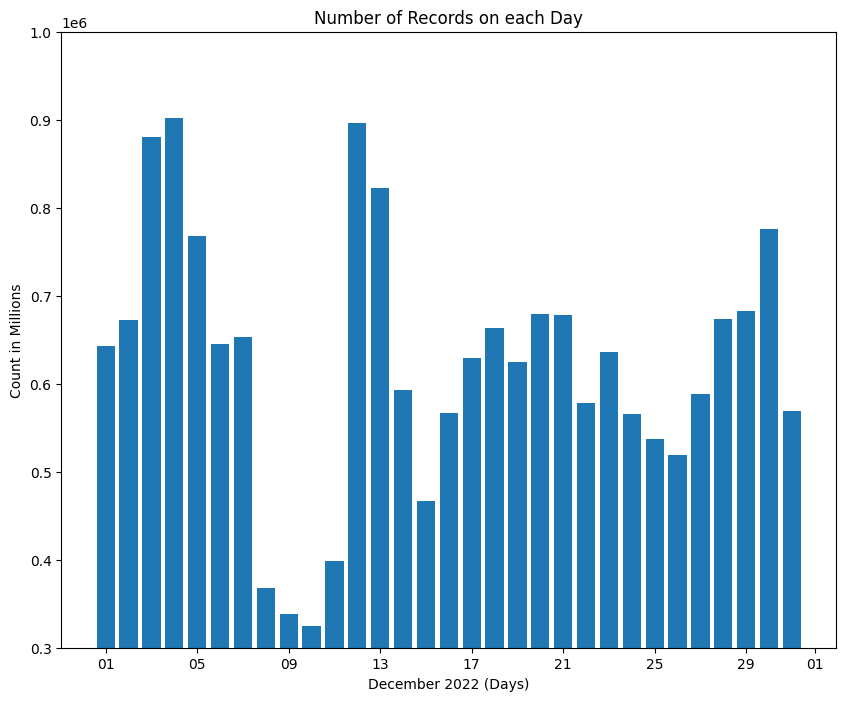

In [55]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plot Space
fig = plt.figure(figsize = (10, 8))

# Plot for x and y axis
plt.bar(dateWiseCount.index, dateWiseCount.values)

# Labels & Title
plt.xlabel('December 2022 (Days)')
plt.ylabel('Count in Millions')
plt.title('Number of Records on each Day')
plt.ylim(300000, 1000000) 

# Date format 
dateForm = DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(dateForm)
plt.show()

***
`The above chart gives an idea about number of counts on a daily basis and its notable that dates betweeb 8 and 11 of december is having a very low requests should dig deeper to know the insights.`
***

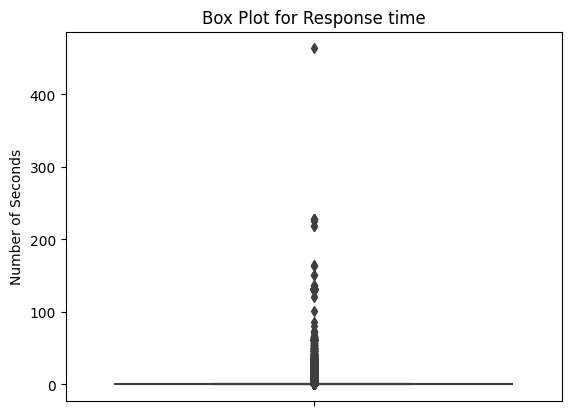

In [56]:
# Box Plot for Response time 

sns.boxplot(data=ds, y='Response Time')
plt.title("Box Plot for Response time")
plt.ylabel("Number of Seconds")
plt.show()

In [57]:
# ds.drop(ds[ds['Response Time'] > 12].index, inplace=True)

In [58]:
# ds[(ds['Response Time'] >= 400)].value_counts().sum()
ds[(ds['Response Time'] >= 200)]

,Time Stamp,Event ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Organization,Entity,Timestamp Request,Timestamp Response,Response Time,Request by
171406,2022-12-20 11:35:32,1KJVWQGTNXKKY1WVW9F271URUC,34.89.17.136,PATCH,https://api-dot-docdigitizer.appspot.com/api/v...,USER_KEY Cla,8c9401112ba44bd793d07d52cf496aa0,DocumentReviewClassResource.patch,1d4bcb08-f225-452e-8ecf-c5551372a098,reviewer__Claudia Leite,2022-12-20 11:31:31.658684,2022-12-20 11:35:19.116514,227.457830,User
210266,2022-12-20 11:34:30,F012EX9PIT3SN4OJJA7W0Z0,34.89.17.136,PATCH,https://api-dot-docdigitizer.appspot.com/api/v...,USER_KEY Cla,8c9401112ba44bd793d07d52cf496aa0,DocumentReviewClassResource.patch,1d4bcb08-f225-452e-8ecf-c5551372a098,reviewer__Claudia Leite,2022-12-20 11:30:36.551532,2022-12-20 11:34:25.300922,228.749390,User
256292,2022-12-20 11:33:31,45A038UTVRHFFU2HEN9JF9Z5,35.246.127.160,PATCH,https://api-dot-docdigitizer.appspot.com/api/v...,USER_KEY Cla,8c9401112ba44bd793d07d52cf496aa0,DocumentReviewClassResource.patch,1d4bcb08-f225-452e-8ecf-c5551372a098,reviewer__Claudia Leite,2022-12-20 11:29:37.895141,2022-12-20 11:33:25.897475,228.002334,User
292880,2022-12-20 11:32:52,V14Y3PEFN3FT1D4MZE05EXDWJ,35.246.127.160,PATCH,https://api-dot-docdigitizer.appspot.com/api/v...,USER_KEY Cla,8c9401112ba44bd793d07d52cf496aa0,DocumentReviewClassResource.patch,1d4bcb08-f225-452e-8ecf-c5551372a098,reviewer__Claudia Leite,2022-12-20 11:28:39.643718,2022-12-20 11:32:25.693475,226.049757,User
4005139,2022-12-15 09:08:41,YAM8NVK5FBEUJTH3R333UZ0S,34.142.7.58,PATCH,https://api-dot-docdigitizer.appspot.com/api/v...,USER_KEY 683,19c686bdffe71b8e3c063d7de4307c70,DocumentReviewClassResource.patch,9360f6cc-a025-47db-bbf2-b4046f27f8a6,reviewer__Joao Silva,2022-12-15 09:04:13.275446,2022-12-15 09:07:52.030056,218.754610,User
4142061,2022-12-15 09:05:31,15XIS7XBW59K118M2YDI2KWJS5,34.142.7.58,PATCH,https://api-dot-docdigitizer.appspot.com/api/v...,USER_KEY 683,19c686bdffe71b8e3c063d7de4307c70,DocumentReviewClassResource.patch,9360f6cc-a025-47db-bbf2-b4046f27f8a6,reviewer__Joao Silva,2022-12-15 09:01:48.437991,2022-12-15 09:05:26.405002,217.967011,User
1582703,2022-12-30 13:29:57,MQDDLZOEKCDM7HHBEGXGPURR,34.105.166.19,PATCH,https://api-dot-docdigitizer.appspot.com/api/v...,USER_KEY 195,470fac0b7a19eef96446ae00d1220f1a,DocumentReviewClassResource.patch,9360f6cc-a025-47db-bbf2-b4046f27f8a6,reviewer__Susana Orfao,2022-12-30 13:22:04.444145,2022-12-30 13:29:48.049701,463.605556,User


In [59]:
ds[(ds['Request by'] == "User") & (ds['Response Time'] >= 12)]['Entity'].value_counts()


Entity
reviewer__Ines Quadros                                 147
reviewer__Claudia Leite                                141
reviewer__Marlene Silva                                128
reviewer__Andre Domingos                               111
reviewer__Soraia Melo                                  109
d61f7b0f-ca58-4b44-a9ab-6186993c49b3                    94
reviewer__Maria Lobo                                    89
reviewer__Joao Silva                                    85
reviewer__Susana Orfao                                  72
reviewer__Marlisa Furtado                               69
reviewer__Flavio Martins                                60
reviewer__Mafalda Santos                                53
reviewer__Joao Monteiro                                 49
dd3e28c8-ce2f-46a0-be4a-ddd826737d88                    44
reviewer__Beatriz Branco                                33
reviewer__Mariana Tavares                               31
reviewer__Lakysme Rocha                          

In [60]:
ds[(ds['Request by'] == "App") & (ds['Response Time'] >= 12)]['Entity'].value_counts()

Entity
Mandela Job Runner                          1437
cristina.barreira-org_app                    918
cofidis_p2-org_app                            38
aefb00ca-0e49-43f5-b922-b4dd533b860f          25
2b5bd496-f0c9-4e13-b5f1-d7825c81bc3e_app      10
montepio2.0pro-org_app                         7
pjgs.sousa-org_app                             6
6b1faf26-cb89-4cc0-a158-d494e1c664cd_app       5
3d8783a9-5f34-4231-ac87-fc925bc12bd1           4
1dd6354d-f537-4944-a9f0-aba7ffc9dc2b_app       3
674a28cc-d355-4cc7-b61b-f72bc550e396_app       2
f00716b5-e120-4699-b827-791d6e2a2565_app       2
859d79a1-fa30-4a69-9947-78f62ba4b12e_app       2
luis.seabra-org_app                            1
b25f815c-cc24-45ad-9a3c-5141312d3212           1
Name: count, dtype: int64

`Here we are converting the Unique Organization ID as a Random Names for Convenience`
***

In [61]:
# Create a dictionary to map unique values to convenience names
orgMapping = {org: f'Company {i+1}' for i, org in enumerate(ds['Organization'].unique()) if org != 'No Org Name'}

# Create a new column 'Company Name' based on the convenience names
ds['Org Name'] = ds['Organization'].apply(lambda org: 'No Org Name' if org == 'No Org Name' else orgMapping.get(org))
print(ds)

                 Time Stamp                    Event ID        Source IP   
0       2022-12-03 10:04:59   1DMCVIS7EJYGWLZK8E1IVEHK7    62.48.164.172  \
1       2022-12-03 10:04:59  1N0ZBFXCQLC9D1CYP3LZ4DJ77C    62.48.164.172   
2       2022-12-03 10:04:59    X3RIHMV1ZEQ134P688O1EK3J  147.161.190.206   
3       2022-12-03 10:05:00   1HFUT7IBU0HDX1SM3BH8C34K4    3.224.122.159   
4       2022-12-03 10:05:00   OT7HRQFV00EY110WGEKTB1T12    3.224.122.159   
...                     ...                         ...              ...   
2028297 2022-12-30 23:08:51   Y7QLBP7V0N1F1EVYMN83FS4W3    194.79.66.193   
2028298 2022-12-30 23:08:51   10ERQZ542G9HC18WJM8V1380B    62.48.164.172   
2028299 2022-12-30 23:08:51   1H5Z3US6Y2OCYPIVSW7AZO14V    194.79.66.193   
2028300 2022-12-30 23:08:51  1R23QCMH4GNVP1IXFAT38RUEI2    194.79.66.193   
2028301 2022-12-30 23:08:51    DEMCOLL9VMI3EXSNPQ9NUK46    62.48.164.170   

        HTTP Method                                           HTTP Url   
0            

In [62]:
ds[(ds['Organization'].notnull()) & (ds['Response Time'] >= 0.1910155)]['Org Name'].value_counts()
# ds[(ds['Organization'].notnull()) & (ds['Response Time'] >= 0.1910155)]['Organization'].value_counts()

Org Name
Company 4      899180
Company 1      266042
Company 8      164585
Company 30     153761
Company 3      101944
                ...  
Company 66          5
Company 48          3
Company 72          3
Company 54          2
No Org Name         1
Name: count, Length: 72, dtype: int64

In [63]:
ds[ds['Organization'] == "No Org Name"]

,Time Stamp,Event ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Organization,Entity,Timestamp Request,Timestamp Response,Response Time,Request by,Org Name
27,2022-12-03 10:05:00,1THWVBTI42Q8ODU6Y0FXTPYJ9,No IP,GET,https://10.154.0.122/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-03 10:04:51.992344,2022-12-03 10:04:51.992640,0.000296,No Data,No Org Name
223,2022-12-03 10:05:16,BDY9GCKZO0TX15DQV3E4UCX6U,No IP,GET,https://10.154.0.123/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-03 10:05:10.080138,2022-12-03 10:05:10.082723,0.002585,No Data,No Org Name
225,2022-12-03 10:05:16,HU508NTG157LJA9PAW3CBOK9,No IP,GET,https://10.154.0.123/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-03 10:05:11.180956,2022-12-03 10:05:11.182381,0.001425,No Data,No Org Name
252,2022-12-03 10:05:20,18ZMVAU9VQ5FP640RTH91PM4T,208.115.199.18,HEAD,https://api.docdigitizer.com/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-03 10:05:01.107954,2022-12-03 10:05:01.108391,0.000437,No Data,No Org Name
286,2022-12-03 10:05:20,N9LJ2VOGDPOV135EFKX93145,35.236.221.2,GET,http://api.docdigitizer.appspot.com/_ah/health,No API,No Hash,No Data,No Org Name,No Entity,2022-12-03 10:05:14.583092,2022-12-03 10:05:14.583376,0.000284,No Data,No Org Name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028275,2022-12-30 23:08:50,7U2XOC11E8K0IU41VFHM0B4M,No IP,GET,https://10.154.0.35/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-30 23:08:29.994555,2022-12-30 23:08:29.994873,0.000318,No Data,No Org Name
2028276,2022-12-30 23:08:50,10K7BXX2GC8961UEJT8ZA3IZSA,No IP,GET,https://10.154.0.35/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-30 23:08:30.663033,2022-12-30 23:08:30.663328,0.000295,No Data,No Org Name
2028277,2022-12-30 23:08:50,SEFR335BBIKZI03Z92ERWG3C,No IP,GET,https://10.154.0.35/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-30 23:08:30.865128,2022-12-30 23:08:30.865429,0.000301,No Data,No Org Name
2028278,2022-12-30 23:08:50,11P960VLDNSPNMD6XH4SBL1LX,No IP,GET,https://10.154.0.35/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-30 23:08:30.955089,2022-12-30 23:08:30.955406,0.000317,No Data,No Org Name


In [64]:
# Calculating basic statistics of the 'Response Time' column with modified format
basicStats = ds['Response Time'].describe().apply(lambda x: format(x, '.9f'))

# Printing the modified statistics
print(basicStats)

count    19338561.000000000
mean            0.146569755
std             0.588863788
min             0.000155000
25%             0.076672000
50%             0.096599000
75%             0.122450000
max           463.605556000
Name: Response Time, dtype: object


In [65]:
# Calculating Inter Quartile Range 

q1 = ds['Response Time'].quantile(0.25)
q3 = ds['Response Time'].quantile(0.75)

interQuartileRange = (q3 - q1)
print("The Inter Quartile Range is: " + str(interQuartileRange) + " Seconds")

The Inter Quartile Range is: 0.045778 Seconds


In [66]:
# Calculating Lower and Upper Fence 

lowerFence = round((q1 - (interQuartileRange*1.5)), 3)
upperFence = round((q3 + (interQuartileRange*1.5)), 3)

print("The Lower Fence Value is: " + str(lowerFence) + " Seconds")
print("The Upper Fence Value is: " + str(upperFence) + " Seconds")

The Lower Fence Value is: 0.008 Seconds
The Upper Fence Value is: 0.191 Seconds


In [67]:
# Number of records above Upper Fence
ds[(ds['Response Time'] > upperFence)].value_counts().sum()

2249713

In [68]:
# Number of records below Lower Fence
ds[(ds['Response Time'] < lowerFence)].value_counts().sum()

4009372

In [69]:
print("The Minimum Value is: " + str(ds['Response Time'].min()) + " Seconds")
print("The Maximum Value is: " + str(ds['Response Time'].max()) + " Seconds")
print("The Mean Value is: " + str(ds['Response Time'].mean()) + " Seconds")
print("The Median Value is: " + str(ds['Response Time'].median()) + " Seconds")
print("The Quartile 1 Value is: " + str(ds['Response Time'].quantile(0.25)) + " Seconds")
print("The Quartile 3 Value is: " + str(ds['Response Time'].quantile(0.75)) + " Seconds")

The Minimum Value is: 0.000155 Seconds
The Maximum Value is: 463.605556 Seconds
The Mean Value is: 0.14656975462739955 Seconds
The Median Value is: 0.096599 Seconds
The Quartile 1 Value is: 0.076672 Seconds
The Quartile 3 Value is: 0.12245 Seconds


***
`The Maximum Value was 463.605556 Seconds for the Response Time columen which is a very abnormal one and also affects the analysis so we are dropping that value and doing the analysis. Later the maximum value was 228 still its high and very far away from the Quartile 3 so we decided to remove the values which are greater than 12 Seconds. Again we removed ~3500 records which are greater than 12 seconds` 
***

In [70]:
# Working on the variable Organisation 
# Get the value counts for the Organization column.
orgCount = ds['Organization'].value_counts()

# Filter the DataFrame to only include organizations with count greater than 1.
orgList = ds[ds['Organization'].isin(orgCount[orgCount > 1000].index)]
print(orgList)

                 Time Stamp                    Event ID        Source IP   
0       2022-12-03 10:04:59   1DMCVIS7EJYGWLZK8E1IVEHK7    62.48.164.172  \
1       2022-12-03 10:04:59  1N0ZBFXCQLC9D1CYP3LZ4DJ77C    62.48.164.172   
2       2022-12-03 10:04:59    X3RIHMV1ZEQ134P688O1EK3J  147.161.190.206   
3       2022-12-03 10:05:00   1HFUT7IBU0HDX1SM3BH8C34K4    3.224.122.159   
4       2022-12-03 10:05:00   OT7HRQFV00EY110WGEKTB1T12    3.224.122.159   
...                     ...                         ...              ...   
2028297 2022-12-30 23:08:51   Y7QLBP7V0N1F1EVYMN83FS4W3    194.79.66.193   
2028298 2022-12-30 23:08:51   10ERQZ542G9HC18WJM8V1380B    62.48.164.172   
2028299 2022-12-30 23:08:51   1H5Z3US6Y2OCYPIVSW7AZO14V    194.79.66.193   
2028300 2022-12-30 23:08:51  1R23QCMH4GNVP1IXFAT38RUEI2    194.79.66.193   
2028301 2022-12-30 23:08:51    DEMCOLL9VMI3EXSNPQ9NUK46    62.48.164.170   

        HTTP Method                                           HTTP Url   
0            

`Here we are revising the Organisation dataframe which have only records more than 1000 so only 48 organisations out of 71 have such records and the balance 23 organisation has just ~4000 records`
****

`# NOW GONNA DO THE EDA BASED ON THE NECESSARY VARIABLES`<br>
`## starting with ORGANISATION`

In [71]:
# Listing the Unique Organisations 

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

orgNameCount = ds['Org Name'].value_counts()
print(orgNameCount)

Org Name
Company 4      6763623
Company 1      3459364
Company 5      1716056
No Org Name    1557800
Company 3      1248018
                ...   
Company 72           7
Company 50           7
Company 66           6
Company 48           3
Company 54           2
Name: count, Length: 72, dtype: int64


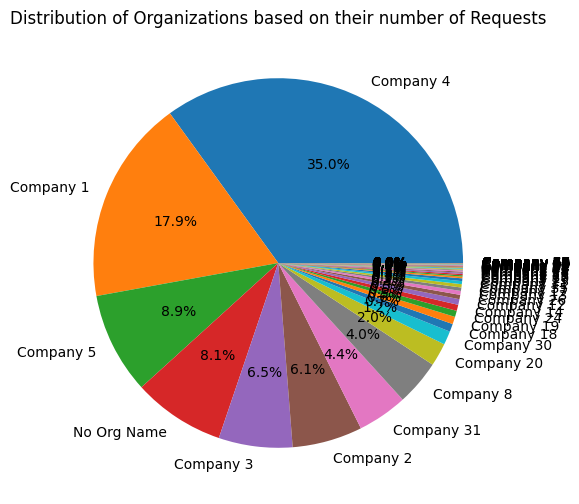

In [72]:
# Create a pie chart with percentage labels
# Reference:  https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(orgNameCount, labels=orgNameCount.index, autopct='%1.1f%%')
plt.title("Distribution of Organizations based on their number of Requests")
# Display the pie chart
plt.show()

`# We can see the above pie chart is clumsy so we are grouping the small values as one for better visualization. Also it is to be noted that the majority (90%) of the values / requests in the top 10`
***

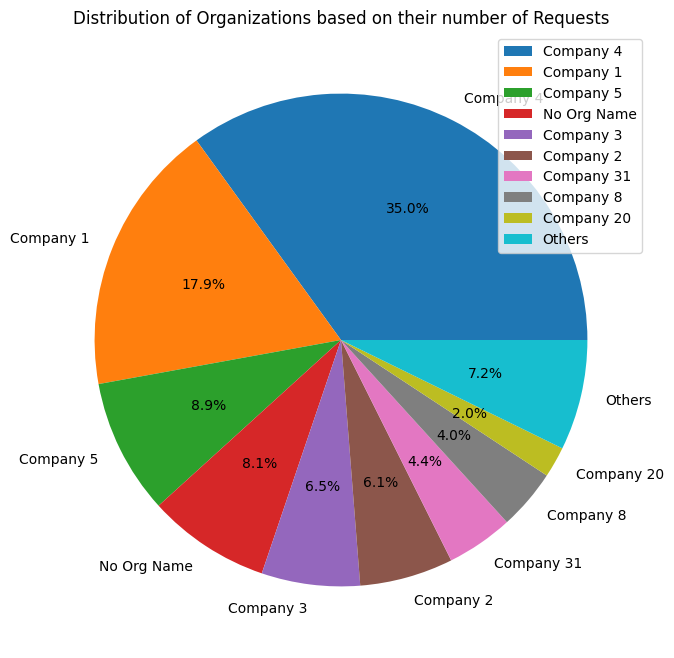

In [73]:
# Calculate the value counts
orgNameCount = ds['Org Name'].value_counts()

# Calculate the threshold for grouping values as "Others"
thresholdPie1 = len(ds) * 0.02

# Group values that occur less than the threshold as "Others"
others_count = orgNameCount[orgNameCount < thresholdPie1].sum()
orgNameCount = orgNameCount[orgNameCount >= thresholdPie1]
orgNameCount['Others'] = others_count

# Create the pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(orgNameCount, labels=orgNameCount.index, autopct='%1.1f%%')
plt.title("Distribution of Organizations based on their number of Requests")

# Add legend with percentages
percentage_labels = [f'{p:.1f}% - {l}' for p, l in zip(orgNameCount.values / sum(orgNameCount.values) * 100, orgNameCount.index)]
plt.legend(loc="best")

# Display the pie chart
plt.show()

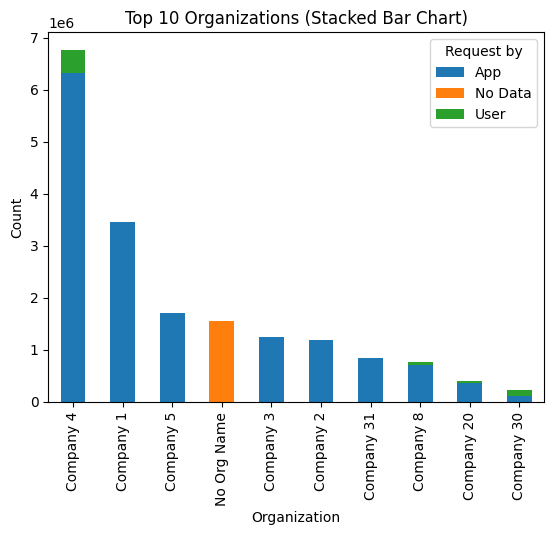

In [74]:

# Group the data by 'Organization' and 'Requested by' columns and calculate the count
grouped_data = ds.groupby(['Org Name', 'Request by']).size().unstack()

# Calculate the total count for each organization
org_totals = grouped_data.sum(axis=1)

# Sort the organizations based on the total count in descending order
sorted_orgs = org_totals.sort_values(ascending=False)

# Select the top 10 organizations
top_10_orgs = sorted_orgs[:10]

# Filter the grouped data to include only the top 10 organizations
filtered_data = grouped_data.loc[top_10_orgs.index]

# Create the stacked bar chart
fig, ax = plt.subplots()
filtered_data.plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title
ax.set_xlabel('Organization')
ax.set_ylabel('Count')
ax.set_title('Top 10 Organizations (Stacked Bar Chart)')

# Display the chart
plt.show()


***
`# Now gonna check the average response time taken by each organisation`
***

In [75]:
# Calculate the average response time by each organization
avgResponseTime = ds.groupby('Org Name')['Response Time'].mean().sort_values(ascending=False)

# Print the average response time by each organization
print(avgResponseTime)


Org Name
Company 7      10.370221
Company 34      6.283301
Company 36      5.826275
Company 46      4.808855
Company 9       4.015544
                 ...    
Company 1       0.122460
Company 2       0.119044
Company 5       0.009417
Company 31      0.009241
No Org Name     0.000391
Name: Response Time, Length: 72, dtype: float64


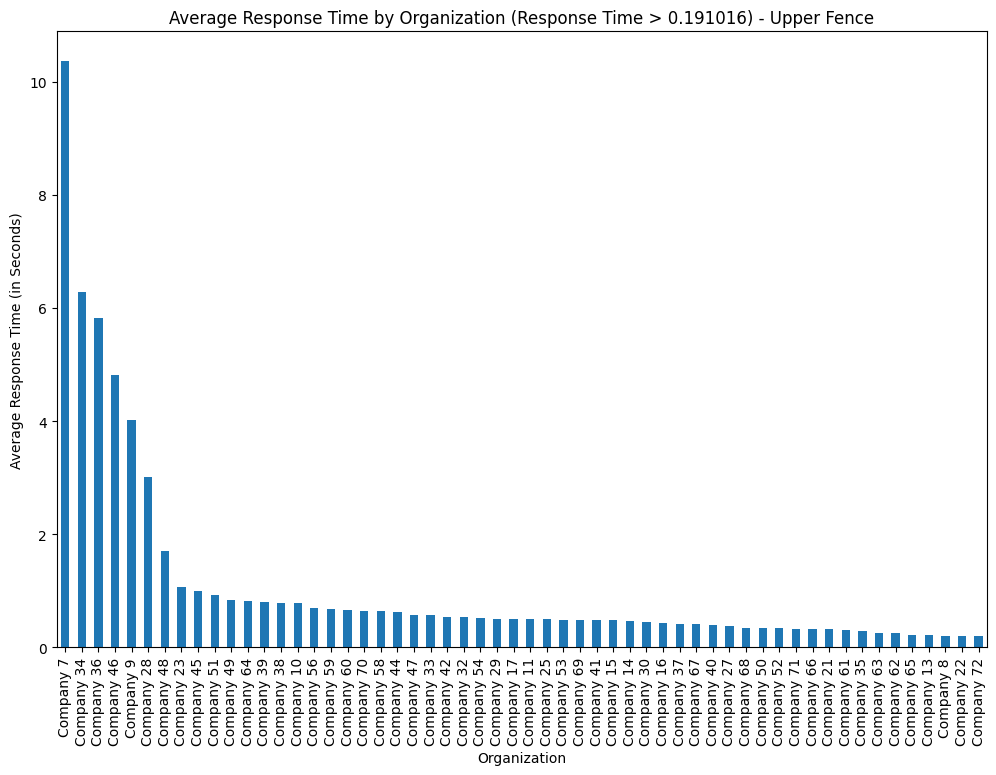

In [76]:
avgResponseTime = ds.groupby('Org Name')['Response Time'].mean()

# Set the threshold for the minimum average response time
thresholdAvgResTime = 0.1910155

# Filter the organizations based on the condition
filteredAvgResponseTime = (avgResponseTime[avgResponseTime > thresholdAvgResTime]).sort_values(ascending=False)

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
filteredAvgResponseTime.plot(kind='bar', ax=ax)

# Set the labels and title
ax.set_xlabel('Organization')
ax.set_ylabel('Average Response Time (in Seconds)')
ax.set_title('Average Response Time by Organization (Response Time > {:.6f}) - Upper Fence'.format(thresholdAvgResTime))

# Display the chart
plt.show()


`By looking at the above bar graph it is noticeable that the Company 7, 36, 34, 46 and 9 have  a response time more than 3 in further anaysis we would be going deep to find the reasons`

***

`Now gonna do the day wise analysis based on number of requests`
***

In [77]:
list(ds.columns)

['Time Stamp',
 'Event ID',
 'Source IP',
 'HTTP Method',
 'HTTP Url',
 'HTTP Auth',
 'HTTP Auth Hash',
 'Resource',
 'Organization',
 'Entity',
 'Timestamp Request',
 'Timestamp Response',
 'Response Time',
 'Request by',
 'Org Name']

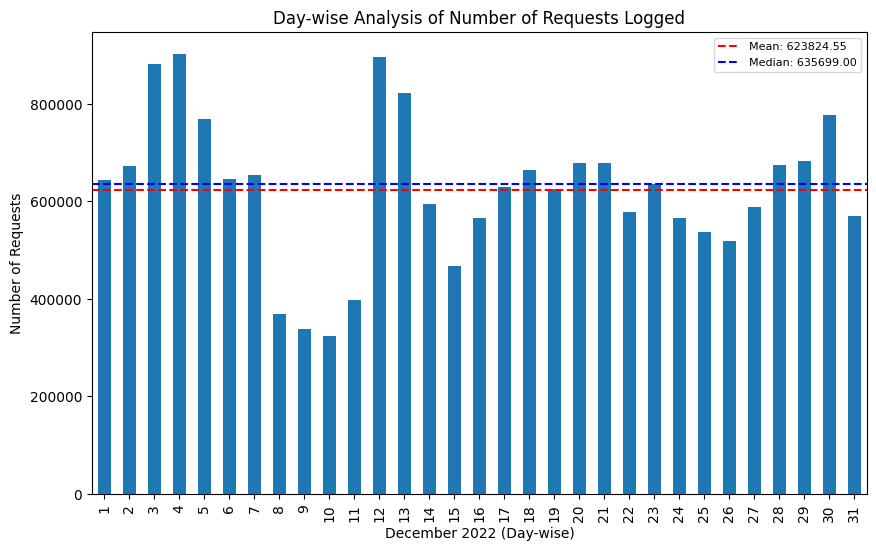

In [78]:
# Extract the day from the 'Time Stamp' column
dayWiseAnalysis = ds['Time Stamp'].dt.day

# Group the data by day and calculate the count or any other desired metric
day_analysis = ds.groupby(dayWiseAnalysis).size()

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
day_analysis.plot(kind='bar', ax=ax)

# Calculate mean and median values
mean_value = day_analysis.mean()
median_value = day_analysis.median()

# Add mean line
mean_line = ax.axhline(mean_value, color='red', linestyle='--')
# Add median line
median_line = ax.axhline(median_value, color='blue', linestyle='--')

# Set the labels and title
ax.set_xlabel('December 2022 (Day-wise)')
ax.set_ylabel('Number of Requests')
ax.set_title('Day-wise Analysis of Number of Requests Logged')

# Create custom legend handles and labels
legend_handles = [mean_line, median_line]
legend_labels = ['Mean: {:.2f}'.format(mean_value), 'Median: {:.2f}'.format(median_value)]

# Add legend
ax.legend(legend_handles, legend_labels, loc='upper right', fontsize=8)

# Display the chart
plt.show()


`# Here we are adding an separation to show the mean and median to know the average and the 50th Quartile. It is also to be noted that there is significant deviation between mean and median`
***

`Request Pattern Analysis`
***

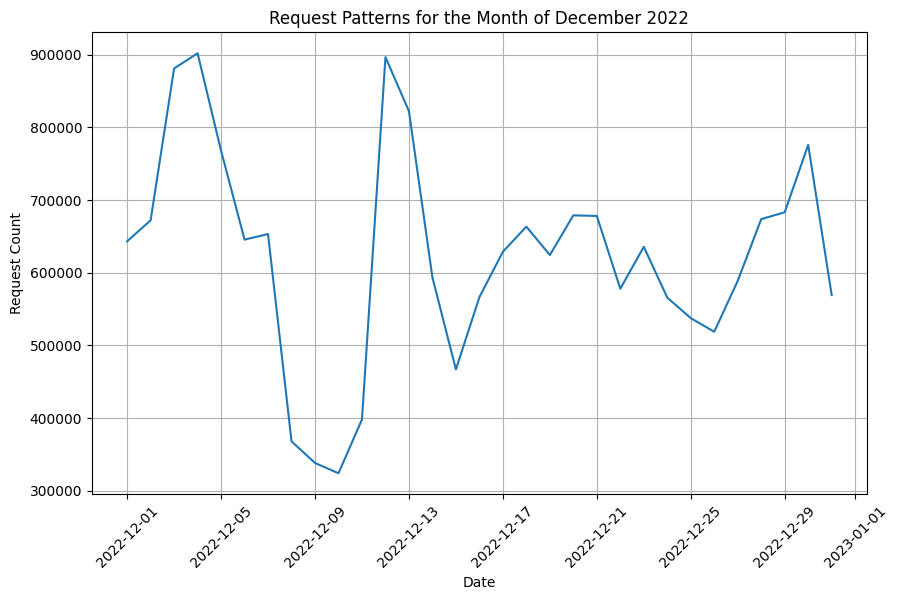

In [79]:
dayWiseAnalysisRP = pd.to_datetime(ds['Time Stamp'], format='%Y-%m-%d %H:%M:%S')

# Extract the date
dateReqPattern = dayWiseAnalysisRP.dt.date

# Group requests by date and count occurrences
request_countsRP = dateReqPattern.value_counts().sort_index()

# Display the request counts per date
# print(request_countsRP)


# Plot the request patterns
plt.figure(figsize=(10, 6))
plt.plot(request_countsRP.index, request_countsRP.values)
plt.xlabel('Date')
plt.ylabel('Request Count')
plt.title('Request Patterns for the Month of December 2022')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


`The above chart shows the Request Patterns on a daily basis lets drill down to break into weeks`

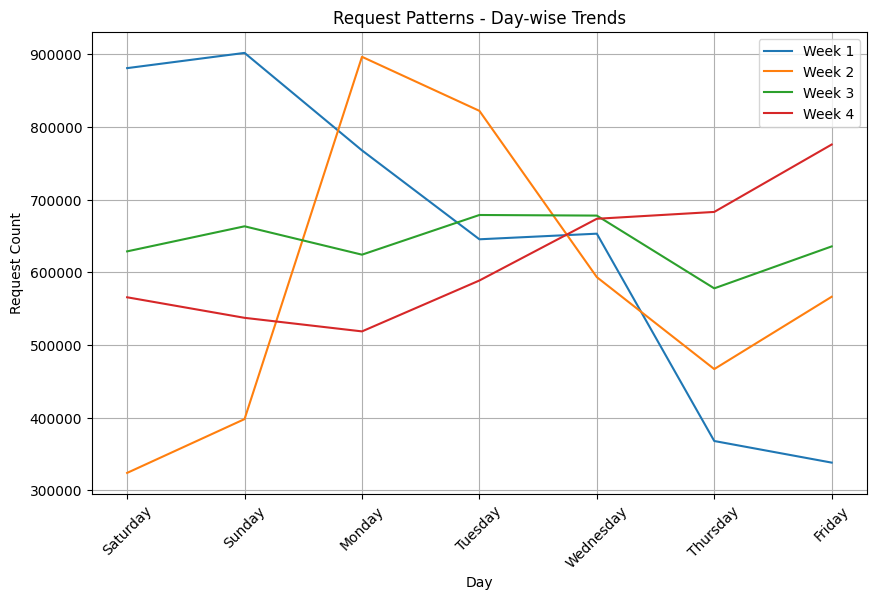

In [80]:
import datetime
import calendar

# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRP = pd.to_datetime(ds['Time Stamp'])

# Define the custom week ranges
week_ranges = {
    1: (datetime.datetime.strptime('2022-12-03', '%Y-%m-%d').date(), datetime.datetime.strptime('2022-12-09', '%Y-%m-%d').date()),
    2: (datetime.datetime.strptime('2022-12-10', '%Y-%m-%d').date(), datetime.datetime.strptime('2022-12-16', '%Y-%m-%d').date()),
    3: (datetime.datetime.strptime('2022-12-17', '%Y-%m-%d').date(), datetime.datetime.strptime('2022-12-23', '%Y-%m-%d').date()),
    4: (datetime.datetime.strptime('2022-12-24', '%Y-%m-%d').date(), datetime.datetime.strptime('2022-12-30', '%Y-%m-%d').date())
}

# Function to assign custom week number based on date
def assign_custom_week(date):
    for week, (start_date, end_date) in week_ranges.items():
        if start_date <= date.date() <= end_date:
            return week

# Extract the date and assign custom week number
weekWiseAnalysisRP = pd.to_datetime(weekWiseAnalysisRP.dt.date)
weekReqPattern = weekWiseAnalysisRP.apply(assign_custom_week)

# Create a dataframe with all weeks and days
all_weeks = range(1, 5)
all_days = list(calendar.day_name)  # List of day names
request_counts_weekly = pd.DataFrame(index=all_weeks, columns=all_days).fillna(0)

# Group requests by week and day and count occurrences
grouped_counts = weekReqPattern.groupby([weekReqPattern, weekWiseAnalysisRP.dt.day_name()]).size()

# Fill in the counts in the request_counts_weekly dataframe
for (week, day), count in grouped_counts.items():
    request_counts_weekly.loc[week, day] = count

# Plot the day-wise trends for all weeks in a single chart
plt.figure(figsize=(10, 6))

# Reorder the days of the week starting from Saturday
reordered_days = all_days[5:] + all_days[:5]

for week in all_weeks:
    plt.plot(request_counts_weekly.loc[week, reordered_days], label=f'Week {week}')

plt.xlabel('Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Day-wise Trends')
plt.xticks(range(7), reordered_days, rotation=45)  # Set the x-axis tick labels as reordered day names and rotate them
plt.legend()
plt.grid(True)
plt.show()


`Here we can notice that the Week 3 and 4 is very stable. Week 1 is having a peak requests in the Weekend and it dropped over the weekday so we have to do additional analysis over there to find the reasoning. I see week 2 as a perfect curve reason being it peaks on monday and its drops over weekend. But still we need to do a depth analysis to conclude.`
***

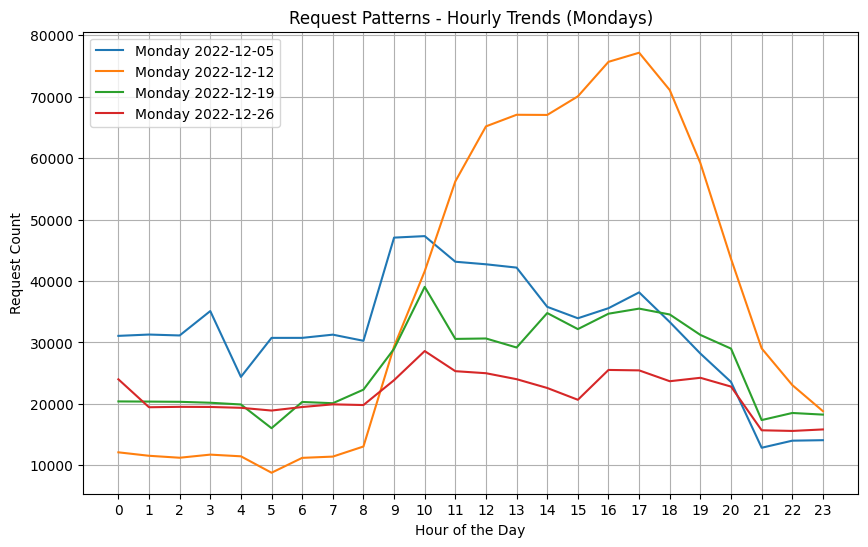

In [81]:
# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRPMonday = pd.to_datetime(ds['Time Stamp'])

# Filter records for Mondays
mondays = weekWiseAnalysisRPMonday[weekWiseAnalysisRPMonday.dt.day_name() == 'Monday']

# Group records by date and hour
groupedRecordsMonday = mondays.groupby([mondays.dt.date, mondays.dt.hour])

# Count occurrences of each date and hour
requestCountsHourlyMonday = groupedRecordsMonday.size().unstack(fill_value=0)

# Plot the hourly trends for different Mondays in the month
plt.figure(figsize=(10, 6))

for date in requestCountsHourlyMonday.index:
    plt.plot(requestCountsHourlyMonday.columns, requestCountsHourlyMonday.loc[date], label=f'Monday {date}')

plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Hourly Trends (Mondays)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


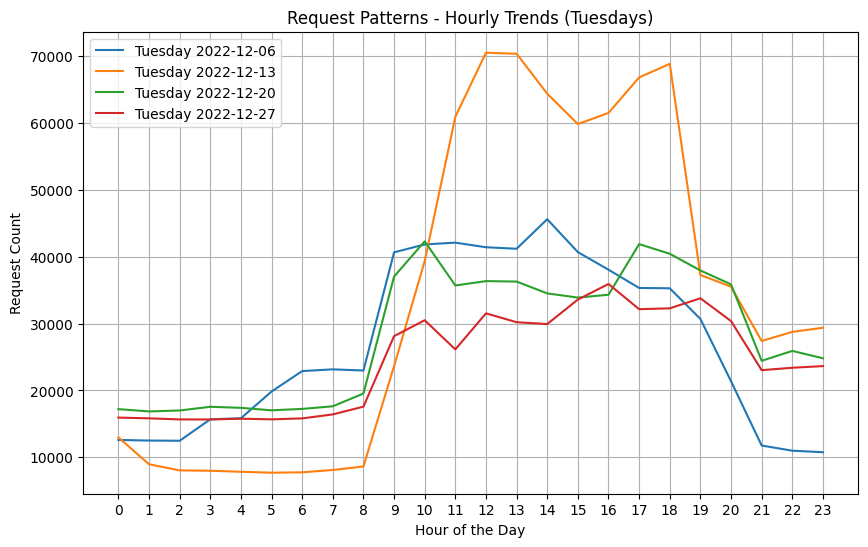

In [82]:
# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRPTuesday = pd.to_datetime(ds['Time Stamp'])

# Filter records for Tuesdays
tuesdays = weekWiseAnalysisRPTuesday[weekWiseAnalysisRPTuesday.dt.day_name() == 'Tuesday']

# Group records by date and hour
groupedRecordsTuesday = tuesdays.groupby([tuesdays.dt.date, tuesdays.dt.hour])

# Count occurrences of each date and hour
requestCountsHourlyTuesday = groupedRecordsTuesday.size().unstack(fill_value=0)

# Plot the hourly trends for different Tuesdays in the month
plt.figure(figsize=(10, 6))

for date in requestCountsHourlyTuesday.index:
    plt.plot(requestCountsHourlyTuesday.columns, requestCountsHourlyTuesday.loc[date], label=f'Tuesday {date}')

plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Hourly Trends (Tuesdays)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


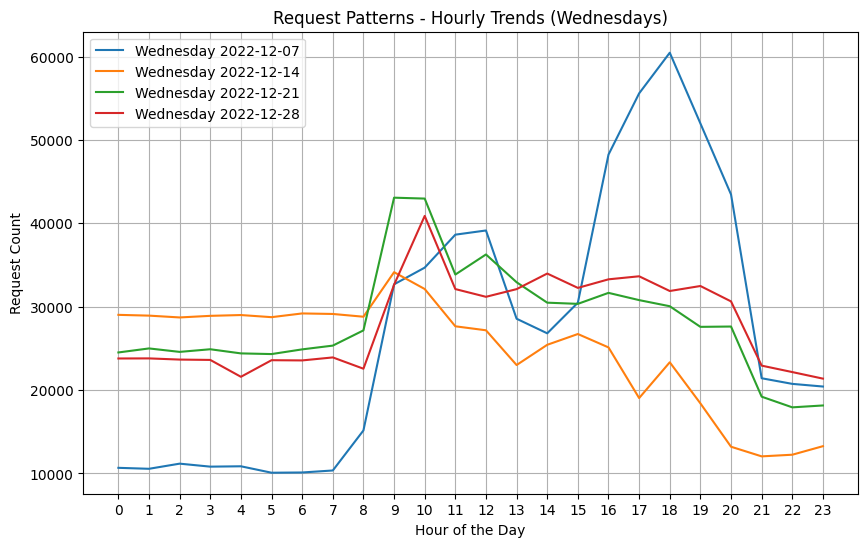

In [83]:
# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRPWednesday = pd.to_datetime(ds['Time Stamp'])

# Filter records for Wednesdays
wednesdays = weekWiseAnalysisRPWednesday[weekWiseAnalysisRPWednesday.dt.day_name() == 'Wednesday']

# Group records by date and hour
groupedRecordsWednesday = wednesdays.groupby([wednesdays.dt.date, wednesdays.dt.hour])

# Count occurrences of each date and hour
requestCountsHourlyWednesday = groupedRecordsWednesday.size().unstack(fill_value=0)

# Plot the hourly trends for different Wednesdays in the month
plt.figure(figsize=(10, 6))

for date in requestCountsHourlyWednesday.index:
    plt.plot(requestCountsHourlyWednesday.columns, requestCountsHourlyWednesday.loc[date], label=f'Wednesday {date}')

plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Hourly Trends (Wednesdays)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


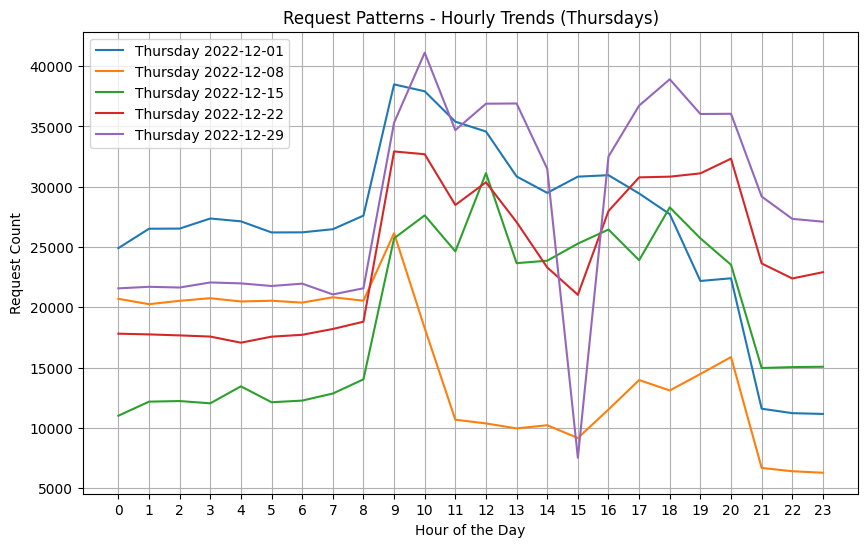

In [84]:
# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRPThursday = pd.to_datetime(ds['Time Stamp'])

# Filter records for Thursdays
thursdays = weekWiseAnalysisRPThursday[weekWiseAnalysisRPThursday.dt.day_name() == 'Thursday']

# Group records by date and hour
groupedRecordsThursday = thursdays.groupby([thursdays.dt.date, thursdays.dt.hour])

# Count occurrences of each date and hour
requestCountsHourlyThursday = groupedRecordsThursday.size().unstack(fill_value=0)

# Plot the hourly trends for different Thursdays in the month
plt.figure(figsize=(10, 6))

for date in requestCountsHourlyThursday.index:
    plt.plot(requestCountsHourlyThursday.columns, requestCountsHourlyThursday.loc[date], label=f'Thursday {date}')

plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Hourly Trends (Thursdays)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


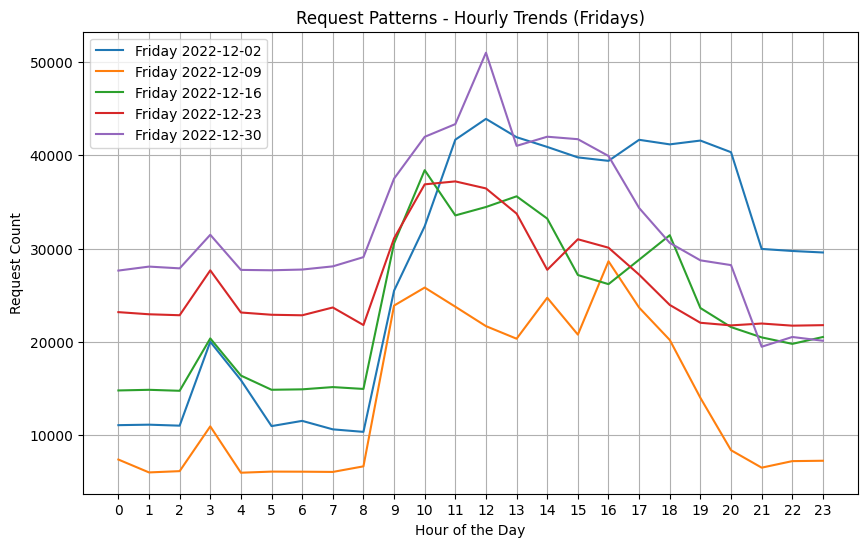

In [85]:
# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRPFriday = pd.to_datetime(ds['Time Stamp'])

# Filter records for Fridays
fridays = weekWiseAnalysisRPFriday[weekWiseAnalysisRPFriday.dt.day_name() == 'Friday']

# Group records by date and hour
groupedRecordsFriday = fridays.groupby([fridays.dt.date, fridays.dt.hour])

# Count occurrences of each date and hour
requestCountsHourlyFriday = groupedRecordsFriday.size().unstack(fill_value=0)

# Plot the hourly trends for different Fridays in the month
plt.figure(figsize=(10, 6))

for date in requestCountsHourlyFriday.index:
    plt.plot(requestCountsHourlyFriday.columns, requestCountsHourlyFriday.loc[date], label=f'Friday {date}')

plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Hourly Trends (Fridays)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


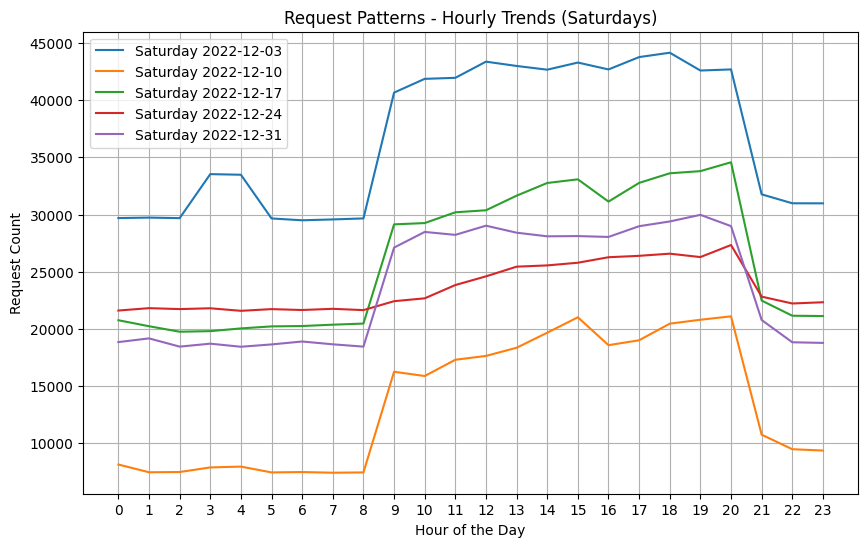

In [86]:
# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRPSaturday = pd.to_datetime(ds['Time Stamp'])

# Filter records for Saturdays
saturdays = weekWiseAnalysisRPSaturday[weekWiseAnalysisRPSaturday.dt.day_name() == 'Saturday']

# Group records by date and hour
groupedRecordsSaturday = saturdays.groupby([saturdays.dt.date, saturdays.dt.hour])

# Count occurrences of each date and hour
requestCountsHourlySaturday = groupedRecordsSaturday.size().unstack(fill_value=0)

# Plot the hourly trends for different Saturdays in the month
plt.figure(figsize=(10, 6))

for date in requestCountsHourlySaturday.index:
    plt.plot(requestCountsHourlySaturday.columns, requestCountsHourlySaturday.loc[date], label=f'Saturday {date}')

plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Hourly Trends (Saturdays)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


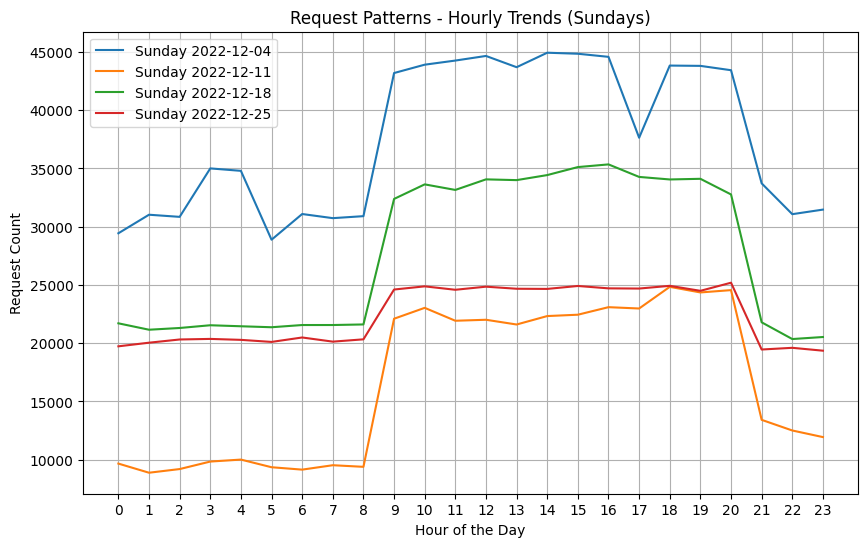

In [87]:
# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRPSunday = pd.to_datetime(ds['Time Stamp'])

# Filter records for Sundays
sundays = weekWiseAnalysisRPSunday[weekWiseAnalysisRPSunday.dt.day_name() == 'Sunday']

# Group records by date and hour
groupedRecordsSunday = sundays.groupby([sundays.dt.date, sundays.dt.hour])

# Count occurrences of each date and hour
requestCountsHourlySunday = groupedRecordsSunday.size().unstack(fill_value=0)

# Plot the hourly trends for different Sundays in the month
plt.figure(figsize=(10, 6))

for date in requestCountsHourlySunday.index:
    plt.plot(requestCountsHourlySunday.columns, requestCountsHourlySunday.loc[date], label=f'Sunday {date}')

plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Hourly Trends (Sundays)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


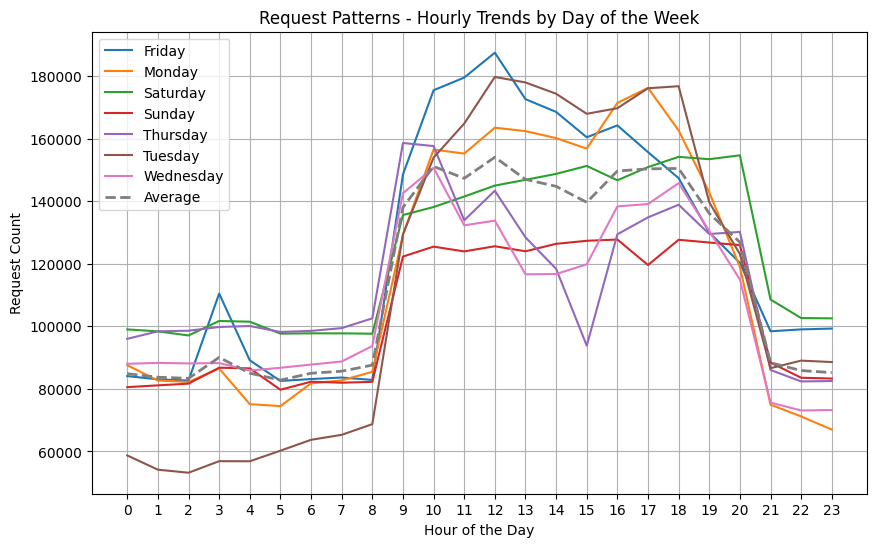

In [88]:
# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRPAllDaysFull = pd.to_datetime(ds['Time Stamp'])

# Group records by day of the week and hour
groupedRecordsFullWeekAverage = weekWiseAnalysisRPAllDaysFull.groupby([weekWiseAnalysisRPAllDaysFull.dt.day_name(), weekWiseAnalysisRPAllDaysFull.dt.hour])

# Calculate the average occurrences of each day and hour
requestCountsHourlyAvgFullWeek = groupedRecordsFullWeekAverage.size().unstack(fill_value=0)

# Plot the hourly trends for each day of the week
plt.figure(figsize=(10, 6))

# Plot individual lines for each day
for day, counts in requestCountsHourlyAvgFullWeek.iterrows():
    plt.plot(range(24), counts, label=day)

# Calculate the average line
averageCountsFullWeek = requestCountsHourlyAvgFullWeek.mean()
plt.plot(range(24), averageCountsFullWeek, label='Average', linewidth=2, linestyle='--')

plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Hourly Trends by Day of the Week')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


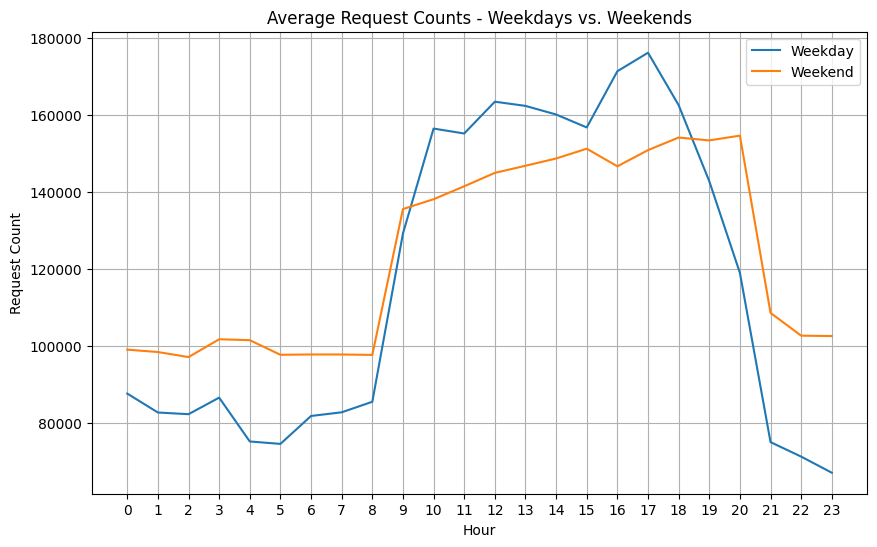

In [89]:
# Convert 'Time Stamp' column to datetime
weekWiseAnalysisRPWeekdayVsWeekend = pd.to_datetime(ds['Time Stamp'])

# Extract the day of the week and hour
dayOfWeekWvW = weekWiseAnalysisRPWeekdayVsWeekend.dt.day_name()
hourOfDayWvW = weekWiseAnalysisRPWeekdayVsWeekend.dt.hour

# Group records by day of the week and hour, and count occurrences
requestCountsHourlyVs = ds.groupby([dayOfWeekWvW, hourOfDayWvW]).size().unstack()

# Plot the average request counts for weekdays and weekends
plt.figure(figsize=(10, 6))
plt.plot(range(24), requestCountsHourlyVs.loc['Monday'].fillna(0).values, label='Weekday')
plt.plot(range(24), requestCountsHourlyVs.loc['Saturday'].fillna(0).values, label='Weekend')
plt.xlabel('Hour')
plt.ylabel('Request Count')
plt.title('Average Request Counts - Weekdays vs. Weekends')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.show()


`#Lets Get into the - Response Time Analysis` 
***

`Average Response Time`
`Response Time Distribution`
`Response Time Trends`
`Response Time Correlations`
`Anomaly Detection`

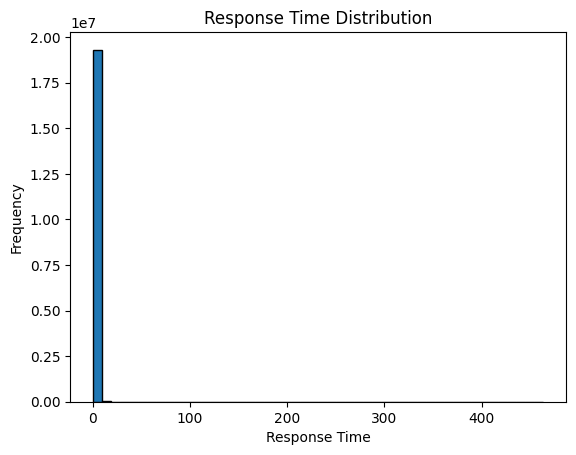

In [90]:
# Assuming you have a DataFrame 'df' with a 'Response Time' column
responseTimeDist = ds['Response Time']

# Plot the response time distribution as a histogram
plt.hist(responseTimeDist, bins=50, edgecolor='black')
plt.xlabel('Response Time')
plt.ylabel('Frequency')
plt.title('Response Time Distribution')
plt.show()


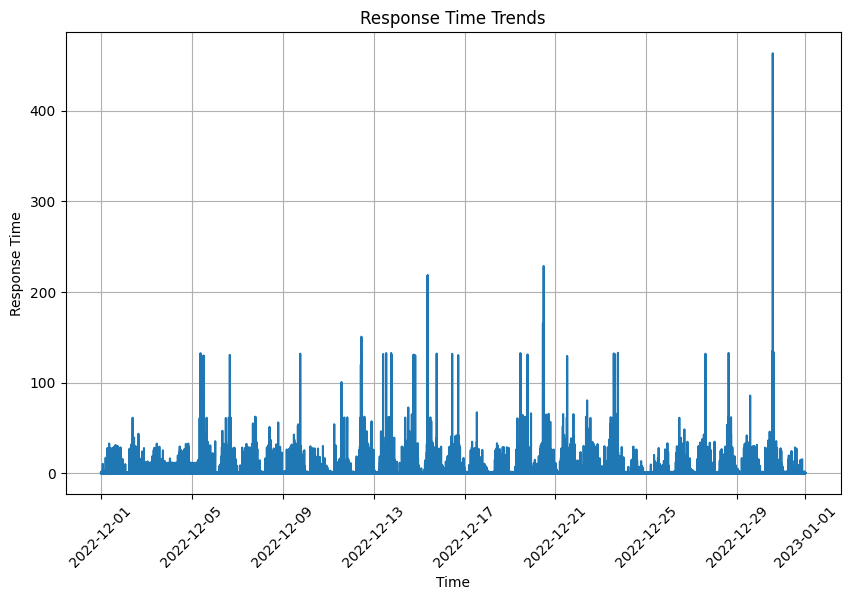

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ds' is a DataFrame with a 'Time Stamp' column and 'Response Time' column
responseTimeTrends = ds['Time Stamp']
responseTimeTrends = pd.to_datetime(ds['Time Stamp'])  # Convert 'Time Stamp' column to datetime

# Sort the DataFrame by 'Time Stamp'
ds.sort_values('Time Stamp', inplace=True)

# Plot the response time trends
plt.figure(figsize=(10, 6))
plt.plot(ds['Time Stamp'], ds['Response Time'])
plt.xlabel('Time')
plt.ylabel('Response Time')
plt.title('Response Time Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [92]:
null_counts = ds.isnull().sum()
unique_counts = ds.nunique()

combined_counts = pd.concat([null_counts, unique_counts], axis=1, keys=['Null Count', 'Unique Count'])

print(combined_counts)

                    Null Count  Unique Count
Time Stamp                   0        851773
Event ID                     0      19338561
Source IP                    0           461
HTTP Method                  0            61
HTTP Url                     0        825221
HTTP Auth                    0           301
HTTP Auth Hash               0           414
Resource                     0            19
Organization                 0            72
Entity                       0           102
Timestamp Request            0      19336185
Timestamp Response           0      19338156
Response Time                0        929039
Request by                   0             3
Org Name                     0            72


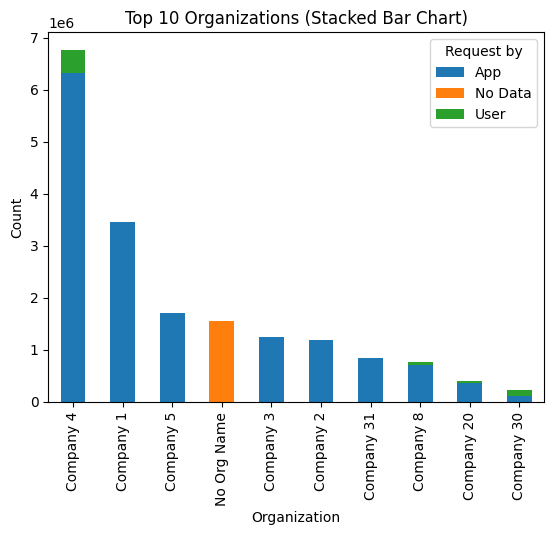

In [93]:

# Group the data by 'Organization' and 'Requested by' columns and calculate the count
grouped_data = ds.groupby(['Org Name', 'Request by']).size().unstack()

# Calculate the total count for each organization
org_totals = grouped_data.sum(axis=1)

# Sort the organizations based on the total count in descending order
sorted_orgs = org_totals.sort_values(ascending=False)

# Select the top 10 organizations
top_10_orgs = sorted_orgs[:10]

# Filter the grouped data to include only the top 10 organizations
filtered_data = grouped_data.loc[top_10_orgs.index]

# Create the stacked bar chart
fig, ax = plt.subplots()
filtered_data.plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title
ax.set_xlabel('Organization')
ax.set_ylabel('Count')
ax.set_title('Top 10 Organizations (Stacked Bar Chart)')

# Display the chart
plt.show()


In [94]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Select relevant columns
selected_columns = ['Source IP', 'HTTP Url', 'HTTP Method', 'HTTP Auth', 'Resource', 'Organization', 'Entity']
df_selected = ds[selected_columns].copy()

# Perform data preprocessing
# Handle missing values if any
df_selected.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded = df_selected.apply(label_encoder.fit_transform)

# Perform clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_encoded)

# Add cluster labels to the DataFrame
df_encoded['Cluster'] = clusters

# Analyze customer behavior based on clusters
cluster_counts = df_encoded['Cluster'].value_counts()
print(cluster_counts)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
1    7624539
3    5203823
4    4389174
2    1738168
0     382857
Name: count, dtype: int64


In [95]:
# Create the rt_class column based on Response Time thresholds
ds['rt_class'] = pd.cut(ds['Response Time'],
                        bins=[-float('inf'), 0.008, 0.191, 5.0, 12.0, float('inf')],
                        labels=['Low Usage', 'Normal', 'High Load', 'Very High Load', 'Suspicious'])

# Display the updated DataFrame
print(ds.head())

                 Time Stamp                    Event ID      Source IP   
4397254 2022-12-01 00:00:02    B9MT8ZBZALNAGQOR6X5GV4DR  3.224.122.159  \
4397235 2022-12-01 00:00:02    5Z6CEKHQTRQGS89AHLVSXLIB  62.48.164.172   
4397236 2022-12-01 00:00:02   1S92KCJ3IYH19T3JUK6DEKPU8  62.48.164.172   
4397237 2022-12-01 00:00:02   18JSCXDXR3FRCB7R3TQXLPFWD  62.48.164.172   
4397238 2022-12-01 00:00:02  1810ADJ735UT41H9XGBHNBXZ1J  62.48.164.172   

        HTTP Method                                           HTTP Url   
4397254         GET  https://api.docdigitizer.com/api/v1/documents/...  \
4397235         GET  https://api.docdigitizer.com/api/v1/documents/...   
4397236         GET  https://api.docdigitizer.com/api/v1/documents/...   
4397237         GET  https://api.docdigitizer.com/api/v1/documents/...   
4397238         GET  https://api.docdigitizer.com/api/v1/tasks/adc3...   

            HTTP Auth                    HTTP Auth Hash              Resource   
4397254  API_KEY 9ffb  74dd77

In [96]:
ds["rt_class"].value_counts()

rt_class
Normal            13079455
Low Usage          4009393
High Load          2218596
Very High Load       27275
Suspicious            3842
Name: count, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

labelEncoderRTClass = LabelEncoder()

# Label encode the rt_class column
ds['rt_class_encoded'] = labelEncoderRTClass.fit_transform(ds['rt_class'])

# Display the updated DataFrame
print(ds.head())

                 Time Stamp                    Event ID      Source IP   
4397254 2022-12-01 00:00:02    B9MT8ZBZALNAGQOR6X5GV4DR  3.224.122.159  \
4397235 2022-12-01 00:00:02    5Z6CEKHQTRQGS89AHLVSXLIB  62.48.164.172   
4397236 2022-12-01 00:00:02   1S92KCJ3IYH19T3JUK6DEKPU8  62.48.164.172   
4397237 2022-12-01 00:00:02   18JSCXDXR3FRCB7R3TQXLPFWD  62.48.164.172   
4397238 2022-12-01 00:00:02  1810ADJ735UT41H9XGBHNBXZ1J  62.48.164.172   

        HTTP Method                                           HTTP Url   
4397254         GET  https://api.docdigitizer.com/api/v1/documents/...  \
4397235         GET  https://api.docdigitizer.com/api/v1/documents/...   
4397236         GET  https://api.docdigitizer.com/api/v1/documents/...   
4397237         GET  https://api.docdigitizer.com/api/v1/documents/...   
4397238         GET  https://api.docdigitizer.com/api/v1/tasks/adc3...   

            HTTP Auth                    HTTP Auth Hash              Resource   
4397254  API_KEY 9ffb  74dd77

In [101]:
ds.loc[((ds['Entity'] == "No Entity"))]

,Time Stamp,Event ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Organization,Entity,Timestamp Request,Timestamp Response,Response Time,Request by,Org Name,rt_class,rt_class_encoded
4397256,2022-12-01 00:00:02,KJ0VP1RXHAZQ15DE9S9Y8TS,No IP,GET,https://10.154.0.124/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-11-30 23:59:54.360597,2022-11-30 23:59:54.361064,0.000467,No Data,No Org Name,Low Usage,1
4397257,2022-12-01 00:00:02,12CYG8VM3MLFN1W90VWGVSU0V7,No IP,GET,https://10.154.0.124/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-11-30 23:59:54.402822,2022-11-30 23:59:54.403120,0.000298,No Data,No Org Name,Low Usage,1
4397258,2022-12-01 00:00:02,THL5F4J6DKTP1X1Z8IA4YHP3J,No IP,GET,https://10.154.0.124/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-11-30 23:59:54.471522,2022-11-30 23:59:54.471928,0.000406,No Data,No Org Name,Low Usage,1
4397344,2022-12-01 00:00:03,QFPE4XSO26WM17YEAO240HDHM,No IP,GET,https://10.154.0.123/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-11-30 23:59:53.860469,2022-11-30 23:59:53.860756,0.000287,No Data,No Org Name,Low Usage,1
4397346,2022-12-01 00:00:03,8NML79LCNMCE1VWXNQ4ID1GCN,No IP,GET,https://10.154.0.123/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-11-30 23:59:54.088979,2022-11-30 23:59:54.089299,0.000320,No Data,No Org Name,Low Usage,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902828,2022-12-31 23:59:54,77OZER1AXZYOVY3J59LMTA3S,No IP,GET,https://10.154.0.21/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-31 23:59:31.947539,2022-12-31 23:59:31.947944,0.000405,No Data,No Org Name,Low Usage,1
902829,2022-12-31 23:59:54,7PHLN8N2U8N9RMPRT9HSM2X,No IP,GET,https://10.154.0.21/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-31 23:59:32.874296,2022-12-31 23:59:32.874577,0.000281,No Data,No Org Name,Low Usage,1
902830,2022-12-31 23:59:54,19XC2L3J46K54FCX5UUIGVOXY,No IP,GET,https://10.154.0.21/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-31 23:59:33.665121,2022-12-31 23:59:33.665457,0.000336,No Data,No Org Name,Low Usage,1
902831,2022-12-31 23:59:54,6IU8P8H9ANPZ15LI79L1177HA,No IP,GET,https://10.154.0.21/liveness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-31 23:59:34.635394,2022-12-31 23:59:34.635663,0.000269,No Data,No Org Name,Low Usage,1


In [107]:
# ds.loc[((ds['URLContent'] == "documents?maxRetrieve=101&annotation_status=success&reviewed=no") & (ds['rt_class']=="Low Usage"))]
ds.loc[((ds['URLContent'] == "readiness_check")  & (ds['Org Name'] == 'No Org Name'))]
# ds.loc[((ds['URLContent'] == "stampSla") & (ds['Org Name'] == 'Company 31'))]
# ds.loc[ds['URLContent'].map(ds['URLContent'].value_counts()) < 15]

,Time Stamp,Event ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Organization,Entity,Timestamp Request,Timestamp Response,Response Time,Request by,Org Name,rt_class,rt_class_encoded,URLContent
4397375,2022-12-01 00:00:13,ZDHY5W570KQOJ8OFPYJ9K8E,No IP,GET,https://10.154.0.123/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-01 00:00:08.726389,2022-12-01 00:00:08.726721,0.000332,No Data,No Org Name,Low Usage,1,readiness_check
4397374,2022-12-01 00:00:13,YUIJW21664U4XYWZBKK7R6CA,No IP,GET,https://10.154.0.123/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-01 00:00:08.639733,2022-12-01 00:00:08.640093,0.000360,No Data,No Org Name,Low Usage,1,readiness_check
4397373,2022-12-01 00:00:13,1JK6FINQRT15SCGUHZHFSUU3Q,No IP,GET,https://10.154.0.123/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-01 00:00:07.937442,2022-12-01 00:00:07.937746,0.000304,No Data,No Org Name,Low Usage,1,readiness_check
4397413,2022-12-01 00:00:14,IB48OLG3DCK9160L6NPSTGNRQ,No IP,GET,https://10.154.0.122/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-01 00:00:09.027039,2022-12-01 00:00:09.027367,0.000328,No Data,No Org Name,Low Usage,1,readiness_check
4397411,2022-12-01 00:00:14,1DAIG3YX6Z6BWDK391Q2DETDW,No IP,GET,https://10.154.0.122/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-01 00:00:08.243956,2022-12-01 00:00:08.244331,0.000375,No Data,No Org Name,Low Usage,1,readiness_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902745,2022-12-31 23:59:48,1IJVP2W18LKTA13Y5XOCY24S89,No IP,GET,https://10.154.0.35/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-31 23:59:35.901926,2022-12-31 23:59:35.902419,0.000493,No Data,No Org Name,Low Usage,1,readiness_check
902743,2022-12-31 23:59:48,LZMREXSVLXKLOJB5XIEGU5JX,No IP,GET,https://10.154.0.35/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-31 23:59:35.188812,2022-12-31 23:59:35.189144,0.000332,No Data,No Org Name,Low Usage,1,readiness_check
902792,2022-12-31 23:59:51,1DZKPDV0HOKTZWY8FQA9WV5GR,No IP,GET,https://10.138.0.34/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-31 23:59:46.403313,2022-12-31 23:59:46.403582,0.000269,No Data,No Org Name,Low Usage,1,readiness_check
902830,2022-12-31 23:59:54,19XC2L3J46K54FCX5UUIGVOXY,No IP,GET,https://10.154.0.21/readiness_check,No API,No Hash,No Data,No Org Name,No Entity,2022-12-31 23:59:33.665121,2022-12-31 23:59:33.665457,0.000336,No Data,No Org Name,Low Usage,1,readiness_check


In [108]:
ds['URLContent'].value_counts().head(4005)

URLContent
stampSla                                                           845144
liveness_check                                                     715108
readiness_check                                                    706170
documents?maxRetrieve=101&annotation_status=success&reviewed=no    231137
ac591f12-b7c8-49b6-bca0-565c443bc099                               214547
                                                                    ...  
1696f6ae-84ae-410b-ae84-bd9f1d1f2e25                                  383
344f70be-9bd4-4d15-965a-84453ed584a5                                  376
cf6027e4-dd9b-486f-9153-0caabf77c98a                                  376
4417d0ce-de2f-4ad9-8902-66e5a4ccfb05                                  375
f6a40f71-3f50-4639-aa7c-d0807898f6af                                  374
Name: count, Length: 4005, dtype: int64

In [109]:
dfCheckRemoved = ds[~ds['URLContent'].isin(['liveness_check', 'readiness_check'])].copy()

In [ ]:
dfCheckRemoved.value_counts().sum()

17917283

In [ ]:
dfCheckRemoved.loc[((dfCheckRemoved['URLContent'] == "readiness_check")  & (dfCheckRemoved['Org Name'] == 'No Org Name'))]

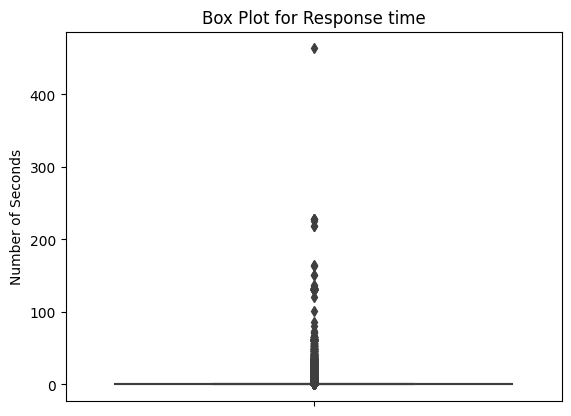

In [110]:
urlBoxPlot = dfCheckRemoved
sns.boxplot(data=urlBoxPlot, y='Response Time')
plt.title("Box Plot for Response time")
plt.ylabel("Number of Seconds")
plt.show()

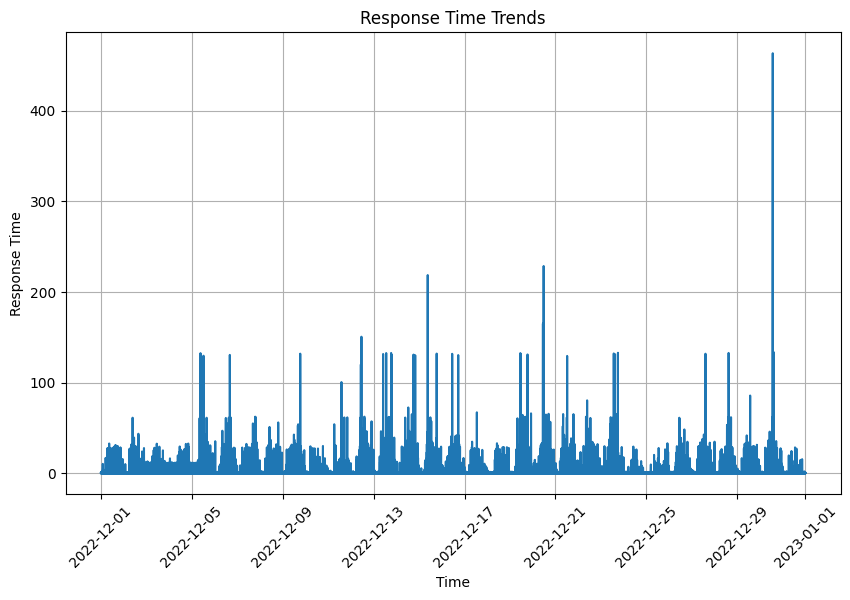

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ds' is a DataFrame with a 'Time Stamp' column and 'Response Time' column
responseTimeTrends = dfCheckRemoved['Time Stamp']
responseTimeTrends = pd.to_datetime(dfCheckRemoved['Time Stamp'])  # Convert 'Time Stamp' column to datetime

# Sort the DataFrame by 'Time Stamp'
dfCheckRemoved.sort_values('Time Stamp', inplace=True)

# Plot the response time trends
plt.figure(figsize=(10, 6))
plt.plot(dfCheckRemoved['Time Stamp'], dfCheckRemoved['Response Time'])
plt.xlabel('Time')
plt.ylabel('Response Time')
plt.title('Response Time Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [112]:
# Separate the value after the address in the URL
ds['URLContent'] = ds['HTTP Url'].apply(lambda url: url.split('/')[-1])

In [113]:
labelEncoderEntity = LabelEncoder()

# Label encode the rt_class column
ds['Org_encoded'] = labelEncoderRTClass.fit_transform(ds['Organization'])

# Display the updated DataFrame
print(ds.head())

                 Time Stamp                    Event ID      Source IP   
4397254 2022-12-01 00:00:02    B9MT8ZBZALNAGQOR6X5GV4DR  3.224.122.159  \
4397235 2022-12-01 00:00:02    5Z6CEKHQTRQGS89AHLVSXLIB  62.48.164.172   
4397236 2022-12-01 00:00:02   1S92KCJ3IYH19T3JUK6DEKPU8  62.48.164.172   
4397237 2022-12-01 00:00:02   18JSCXDXR3FRCB7R3TQXLPFWD  62.48.164.172   
4397238 2022-12-01 00:00:02  1810ADJ735UT41H9XGBHNBXZ1J  62.48.164.172   

        HTTP Method                                           HTTP Url   
4397254         GET  https://api.docdigitizer.com/api/v1/documents/...  \
4397235         GET  https://api.docdigitizer.com/api/v1/documents/...   
4397236         GET  https://api.docdigitizer.com/api/v1/documents/...   
4397237         GET  https://api.docdigitizer.com/api/v1/documents/...   
4397238         GET  https://api.docdigitizer.com/api/v1/tasks/adc3...   

            HTTP Auth                    HTTP Auth Hash              Resource   
4397254  API_KEY 9ffb  74dd77

In [114]:
labelEncoderHTTPMethod = LabelEncoder()

# Label encode the rt_class column
dfCheckRemoved['http_encoded'] = labelEncoderRTClass.fit_transform(dfCheckRemoved['HTTP Method'])

In [ ]:
dfCheckRemoved.head()

,Time Stamp,Event ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Organization,Entity,Timestamp Request,Timestamp Response,Response Time,Request by,Org Name,rt_class,rt_class_encoded,Org_encoded,URLContent,http_encoded
4397254,2022-12-01 00:00:02,B9MT8ZBZALNAGQOR6X5GV4DR,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,74dd77154e7f3618b72e47c501265152,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,f00716b5-e120-4699-b827-791d6e2a2565_app,2022-11-30 23:59:53.843023,2022-11-30 23:59:53.944184,0.101161,App,Company 3,Normal,2,56,e9696acc-3a73-4e65-8fe1-bbfcf0457e1e,17
4397207,2022-12-01 00:00:02,GJHS6KQXKDWTLV5H50VU3CM,193.36.190.25,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY e94b,1540d434f057b5804594eac868dfe51c,DocumentResource.get,09340114-ae3e-452e-9c7a-191f52d34da7,09340114-ae3e-452e-9c7a-191f52d34da7_app,2022-11-30 23:59:24.384301,2022-11-30 23:59:24.484244,0.099943,App,Company 8,Normal,2,2,53d8c45e-c9b3-4cee-9220-684574f2b3f2,17
4397208,2022-12-01 00:00:02,1WGIVUU4P65I81K049SSGVUB7,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,DocumentResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-11-30 23:59:24.936792,2022-11-30 23:59:25.030972,0.094180,App,Company 1,Normal,2,24,b0378096-52f3-4cba-8b71-e4f70e3b3415,17
4397232,2022-12-01 00:00:02,1OM70EIJ6J61C1OLIKWI4YY88H,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/4da0...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,lara.andrade-org,lara.andrade-org_app,2022-11-30 23:59:39.633879,2022-11-30 23:59:39.635110,0.001231,App,Company 5,Low Usage,1,63,4da04239-666e-456e-8094-ad7583041286,17
4397210,2022-12-01 00:00:02,1NN5HFMIZ7G6R205ZWNMUVH34,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/tasks/e324...,API_KEY 2b93,39b62cf39a9c8177ad14f4e04a1fbf6e,TaskResource.get,6b1faf26-cb89-4cc0-a158-d494e1c664cd,6b1faf26-cb89-4cc0-a158-d494e1c664cd_app,2022-11-30 23:59:25.374344,2022-11-30 23:59:25.448860,0.074516,App,Company 1,Normal,2,24,e3244fac-d4c6-4e11-917a-70e64d837a32,17


In [115]:
labelEncoderResource = LabelEncoder()

# Label encode the rt_class column
dfCheckRemoved['resource_encoded'] = labelEncoderRTClass.fit_transform(dfCheckRemoved['Resource'])

# Display the updated DataFrame
dfCheckRemoved.value_counts()

Time Stamp           Event ID                    Source IP      HTTP Method  HTTP Url                                                                                                         HTTP Auth     HTTP Auth Hash                    Resource                  Organization                          Entity                                    Timestamp Request           Timestamp Response          Response Time  Request by  Org Name    rt_class   rt_class_encoded  URLContent                                                       http_encoded  resource_encoded
2022-12-01 00:00:02  113SP9EUDOXLA1Y0VMCRBB1101  3.224.122.159  GET          https://api.docdigitizer.com/api/v1/documents/59704ba6-905a-4f33-9051-8d290e3e542a                               API_KEY 9ffb  74dd77154e7f3618b72e47c501265152  DocumentResource.get      f00716b5-e120-4699-b827-791d6e2a2565  f00716b5-e120-4699-b827-791d6e2a2565_app  2022-11-30 23:59:55.015460  2022-11-30 23:59:55.127034  0.111574       App         Company 3

In [116]:
dfCheckRemoved['http_encoded'].value_counts()

http_encoded
17    16210539
41     1426138
19      234124
39       46199
37          12
        ...   
26           1
15           1
23           1
16           1
54           1
Name: count, Length: 61, dtype: int64

In [117]:
dfCheckRemoved["resource_encoded"].value_counts()

resource_encoded
10    8622314
18    7313507
13     845144
6      384987
7      234419
12     177664
15     136486
3       71648
17      52548
11      46193
9       17724
8        6059
2        4378
5        2401
0        1382
1         248
4         130
14         48
16          3
Name: count, dtype: int64

In [ ]:
X = dfCheckRemoved[['resource_encoded', 'http_encoded', 'Org_encoded']]
y = dfCheckRemoved['rt_class']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Predict the system load indicator for the testing data
y_pred = tree_model.predict(X_test)

# Evaluate the model using appropriate metrics
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

     High Load       0.87      0.35      0.50    443234
     Low Usage       0.95      0.99      0.97    517058
        Normal       0.90      0.98      0.94   2617023
    Suspicious       0.56      0.12      0.20       760
Very High Load       0.88      0.91      0.89      5382

      accuracy                           0.91   3583457
     macro avg       0.83      0.67      0.70   3583457
  weighted avg       0.90      0.91      0.89   3583457



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


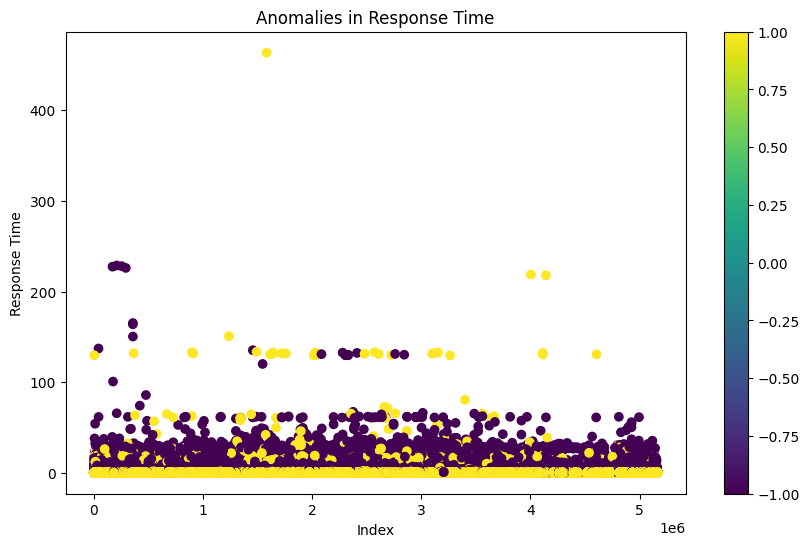

In [ ]:
from sklearn.ensemble import IsolationForest
# features for anomaly detection
features = ['resource_encoded', 'http_encoded', 'Org_encoded', 'rt_class_encoded']

normalized_features = (dfCheckRemoved[features] - dfCheckRemoved[features].mean()) / dfCheckRemoved[features].std()

model = IsolationForest(contamination=0.05)  # Set the contamination parameter
model.fit(normalized_features)

# Predicting the anomalies
predictions = model.predict(normalized_features)

# Adding the predictions to the DataFrame
dfCheckRemoved['Anomaly'] = predictions

plt.figure(figsize=(10, 6))
plt.scatter(dfCheckRemoved.index, dfCheckRemoved['Response Time'], c=dfCheckRemoved['Anomaly'], cmap='viridis')
plt.title('Anomalies in Response Time')
plt.xlabel('Index')
plt.ylabel('Response Time')
plt.colorbar()
plt.show()

In [ ]:
# ds.loc[((ds['URLContent'] == "readiness_check")  & (ds['Org Name'] == 'No Org Name'))]
dfCheckRemoved.loc[(dfCheckRemoved['Anomaly'] == -1)]

,Time Stamp,Event ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Organization,Entity,...,Response Time,Request by,Org Name,rt_class,rt_class_encoded,Org_encoded,URLContent,http_encoded,resource_encoded,Anomaly
4397242,2022-12-01 00:00:02,1WW6LL0QX8EFX1KT6XMSQJF00U,194.79.66.193,POST,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 5b2c,090bd22ca92e56ea593e264a7d807a79,DocumentListAnnotationResource.post,9360f6cc-a025-47db-bbf2-b4046f27f8a6,aefb00ca-0e49-43f5-b922-b4dd533b860f,...,0.708718,App,Company 4,High Load,0,33,annotate:unknown?return_immediately=True,41,6,-1
4397326,2022-12-01 00:00:03,1AXRBWU8N82UZBHM53518YEO9,147.161.190.206,POST,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentListAnnotationResource.post,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,...,0.623220,App,Company 2,High Load,0,42,annotate?return_immediately=True,41,6,-1
4397331,2022-12-01 00:00:03,IGOEIIUG7H1C1D1ZAFKLQRFX,194.79.66.193,POST,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 5b2c,090bd22ca92e56ea593e264a7d807a79,DocumentListAnnotationResource.post,9360f6cc-a025-47db-bbf2-b4046f27f8a6,aefb00ca-0e49-43f5-b922-b4dd533b860f,...,0.695960,App,Company 4,High Load,0,33,annotate:unknown?return_immediately=True,41,6,-1
4397349,2022-12-01 00:00:03,D5BPBYUBNDKXGZM53ML242RJ,147.161.190.206,POST,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentListAnnotationResource.post,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,...,0.175908,App,Company 2,Normal,2,42,annotate?return_immediately=True,41,6,-1
4397430,2022-12-01 00:00:28,1VQ031O88MBNP1Q8PGPVS3OOAM,195.23.64.33,POST,https://api.docdigitizer.com/api/v1/documents/...,API_KEY dad9,0580ef9159e72fabc044082d4304cfbe,DocumentRejectionsListResource.post,benfica-org,benfica-org_app,...,0.838045,App,Company 20,High Load,0,43,rejections,41,9,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008089,2022-12-31 23:55:33,NKNG0DQPGY57VHJBUQ93567I,147.161.190.206,POST,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentListAnnotationResource.post,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,...,0.299612,App,Company 2,High Load,0,42,annotate?return_immediately=True,41,6,-1
970825,2022-12-31 23:56:42,A2DFOIGJ83F41JBPNX0EDO9HT,147.161.190.206,POST,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentListAnnotationResource.post,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,...,0.299803,App,Company 2,High Load,0,42,annotate?return_immediately=True,41,6,-1
997778,2022-12-31 23:57:30,1N19VKRHEWBQU12GSVA2LMZ9QP,147.161.190.206,POST,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentListAnnotationResource.post,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,...,0.296332,App,Company 2,High Load,0,42,annotate?return_immediately=True,41,6,-1
922533,2022-12-31 23:58:31,SUFVPJJBXCYL1HPJRM0H6M6OZ,147.161.190.206,POST,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 8df5,720f73ddb9181eed28df4fe21f262dc4,DocumentListAnnotationResource.post,bcd5ea8f-0fea-41cd-9bab-16582ca49666,26c59bdd-3fea-4c9d-8723-da75a4250f68,...,0.730637,App,Company 2,High Load,0,42,annotate?return_immediately=True,41,6,-1


In [ ]:
import panel as pn
import hvplot.pandas
import matplotlib.pyplot as plt

# Set custom font and other styling
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
# Add other custom styling options as needed

# Assuming you have a DataFrame called 'ds' containing the relevant columns

# Group the data by date and calculate the count of requests per day
request_volume_over_time = dfCheckRemoved.groupby(dfCheckRemoved['Timestamp Request'].dt.date).size()

# Calculate the average response time per day
response_time_over_time = dfCheckRemoved.groupby(dfCheckRemoved['Timestamp Request'].dt.date)['Response Time'].mean()

# Calculate the count of requests per resource
request_count_by_resource = dfCheckRemoved['Resource'].value_counts().nlargest(5)

# Create the Panel components
request_volume_plot = request_volume_over_time.hvplot.line(title='Request Volume over Time', xlabel='Date', ylabel='Request Volume')
response_time_plot = response_time_over_time.hvplot.line(title='Response Time over Time', xlabel='Date', ylabel='Response Time (seconds)')
request_count_plot = request_count_by_resource.hvplot.barh(title='Request Count by Resource', xlabel='Request Count', ylabel='Resource')

# Center-align the titles
title_style = {'text-align': 'center'}

# Combine the components into a layout
dashboard = pn.Column(
    pn.pane.Markdown('# Data Analysis Dashboard', style=title_style),
    pn.Row(request_volume_plot, response_time_plot),
    pn.Row(request_count_plot)
)

# Launch the dashboard
dashboard.show()


Launching server at http://localhost:52377


<ipython-input-247-e33907830523>:31: PanelDeprecationWarning: 'style' is deprecated and will be removed in version 1.1, use 'styles' instead.
  pn.pane.Markdown('# Data Analysis Dashboard', style=title_style),


`# DashBoard Panel Objects`

In [ ]:

""" 
Plot the response time trends:
"""

# Create the response time plot
response_time_plot = plt.figure(figsize=(10, 6))
plt.plot(dfCheckRemoved['Time Stamp'], dfCheckRemoved['Response Time'])
plt.xlabel('Time')
plt.ylabel('Response Time')
plt.title('Response Time Trends')
plt.xticks(rotation=45)
plt.grid(True)

# Convert the plot to a Panel object
response_time_panel = pn.pane.Matplotlib(response_time_plot)



""" 
Average Request Counts - Weekdays vs. Weekends:
"""

# Create the average request counts plot
avg_counts_plot = plt.figure(figsize=(10, 6))
plt.plot(range(24), requestCountsHourlyVs.loc['Monday'].fillna(0).values, label='Weekday')
plt.plot(range(24), requestCountsHourlyVs.loc['Saturday'].fillna(0).values, label='Weekend')
plt.xlabel('Hour')
plt.ylabel('Request Count')
plt.title('Average Request Counts - Weekdays vs. Weekends')
plt.legend()
plt.grid(True)
plt.xticks(range(24))

# Convert the plot to a Panel object
avg_counts_panel = pn.pane.Matplotlib(avg_counts_plot)



""" 
Request Patterns - Hourly Trends by Day of the Week:
"""

# Create the hourly trends plot
hourly_trends_plot = plt.figure(figsize=(10, 6))
for day, counts in requestCountsHourlyAvgFullWeek.iterrows():
    plt.plot(range(24), counts, label=day)
plt.plot(range(24), averageCountsFullWeek, label='Average', linewidth=2, linestyle='--')
plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.title('Request Patterns - Hourly Trends by Day of the Week')
plt.xticks(range(24))
plt.legend()
plt.grid(True)

# Convert the plot to a Panel object
hourly_trends_panel = pn.pane.Matplotlib(hourly_trends_plot)



""" 
Request Patterns - Day-wise Trends:
"""


# Create the day-wise trends plot
day_wise_trends_plot = plt.figure(figsize=(10, 6))
day_analysis.plot(kind='bar')
mean_line = plt.axhline(mean_value, color='red', linestyle='--')
median_line = plt.axhline(median_value, color='blue', linestyle='--')
plt.xlabel('December 2022 (Day-wise)')
plt.ylabel('Number of Requests')
plt.title('Day-wise Analysis of Number of Requests Logged')
legend_handles = [mean_line, median_line]
legend_labels = ['Mean: {:.2f}'.format(mean_value), 'Median: {:.2f}'.format(median_value)]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=8)
plt.grid(True)

# Convert the plot to a Panel object
day_wise_trends_panel = pn.pane.Matplotlib(day_wise_trends_plot)


""" 
Day-wise Analysis of Number of Requests Logged
"""

# Create the day-wise analysis plot
day_wise_analysis_plot = plt.figure(figsize=(10, 6))
day_analysis.plot(kind='bar')
mean_line = plt.axhline(mean_value, color='red', linestyle='--')
median_line = plt.axhline(median_value, color='blue', linestyle='--')
plt.xlabel('December 2022 (Day-wise)')
plt.ylabel('Number of Requests')
plt.title('Day-wise Analysis of Number of Requests Logged')
legend_handles = [mean_line, median_line]
legend_labels = ['Mean: {:.2f}'.format(mean_value), 'Median: {:.2f}'.format(median_value)]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=8)
plt.grid(True)

# Convert the plot to a Panel object
day_wise_analysis_panel = pn.pane.Matplotlib(day_wise_analysis_plot)


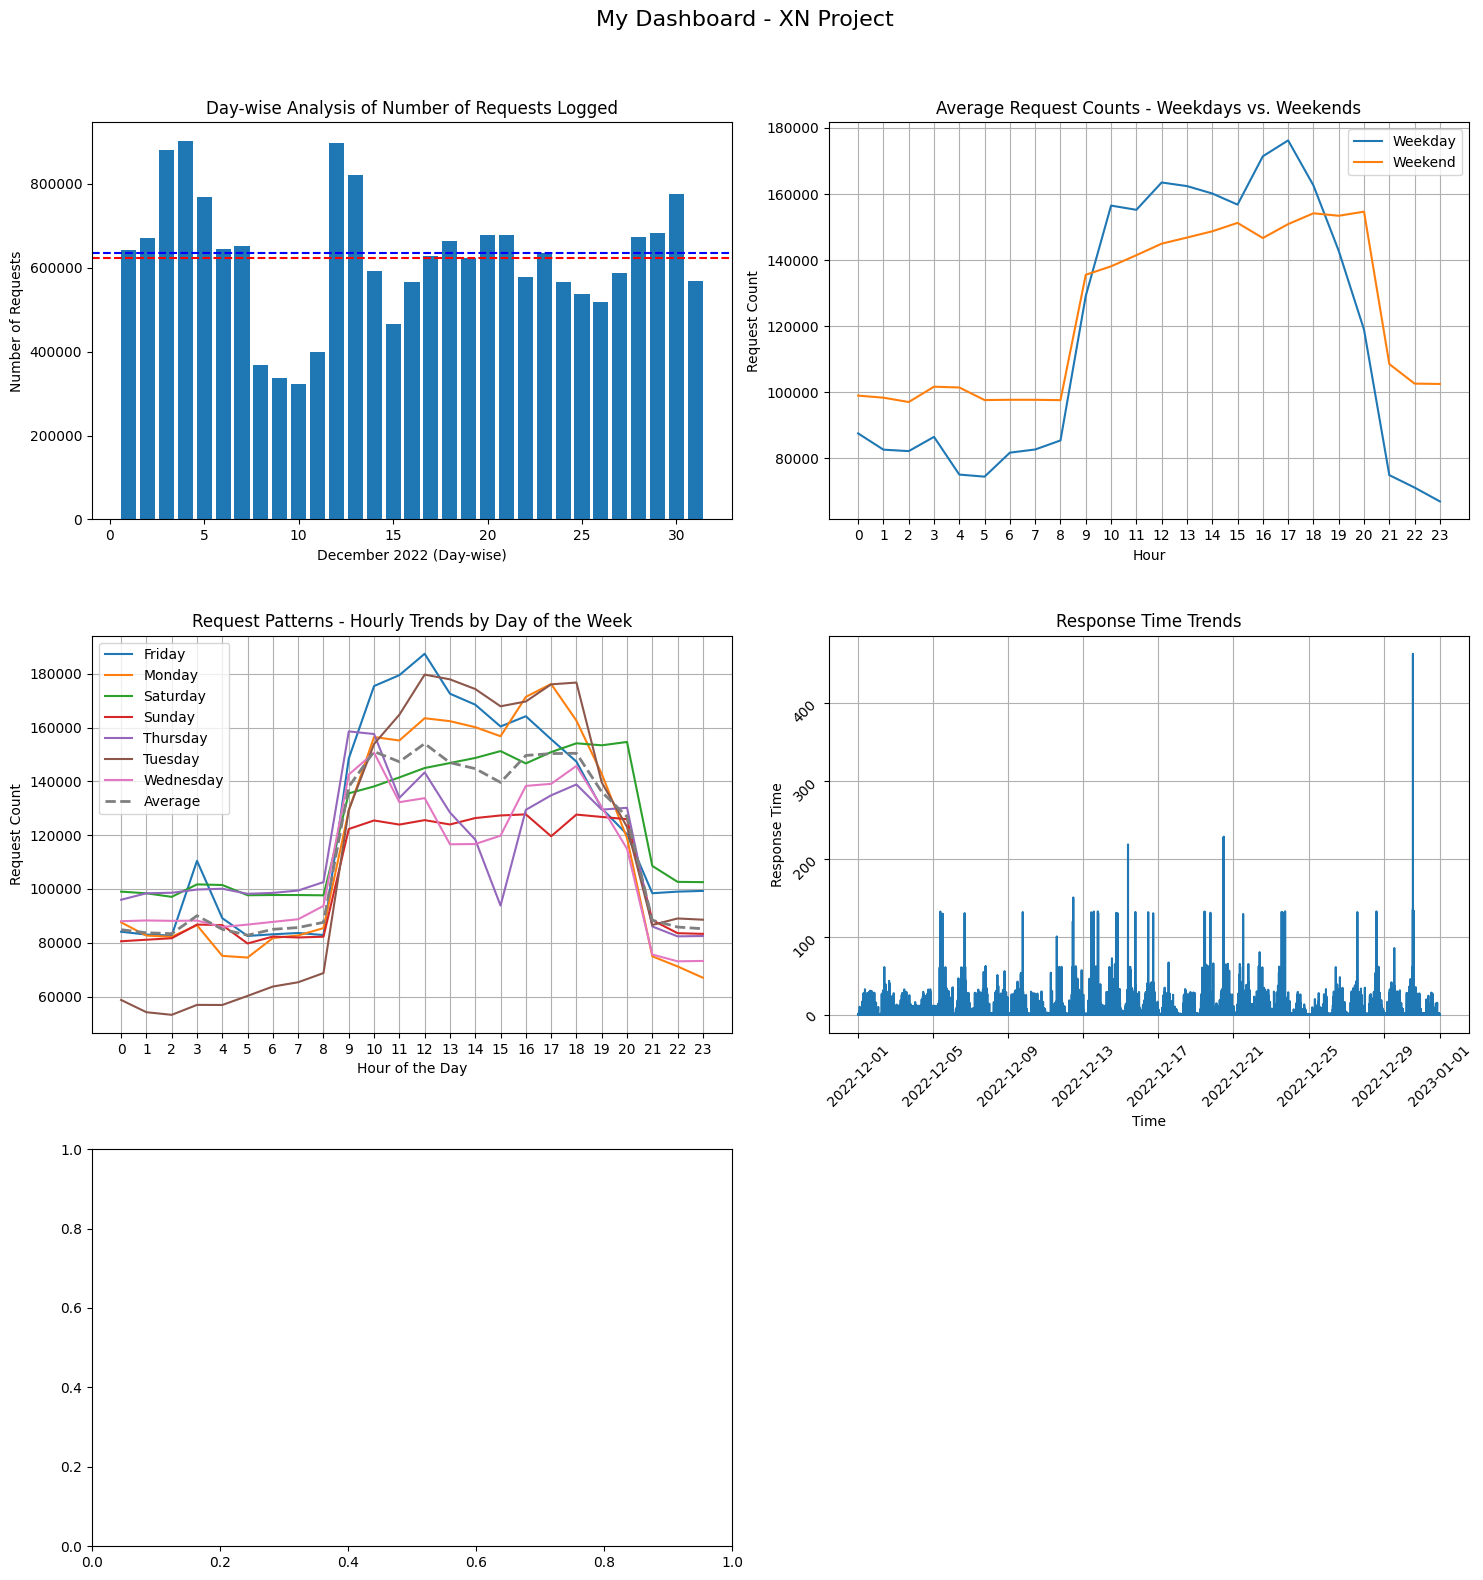

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Create the subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Day-wise Analysis of Number of Requests Logged
axs[0, 0].bar(day_analysis.index, day_analysis)
axs[0, 0].axhline(mean_value, color='red', linestyle='--')
axs[0, 0].axhline(median_value, color='blue', linestyle='--')
axs[0, 0].set_xlabel('December 2022 (Day-wise)')
axs[0, 0].set_ylabel('Number of Requests')
axs[0, 0].set_title('Day-wise Analysis of Number of Requests Logged')

# Average Request Counts - Weekdays vs. Weekends
axs[0, 1].plot(range(24), requestCountsHourlyVs.loc['Monday'].fillna(0).values, label='Weekday')
axs[0, 1].plot(range(24), requestCountsHourlyVs.loc['Saturday'].fillna(0).values, label='Weekend')
axs[0, 1].set_xlabel('Hour')
axs[0, 1].set_ylabel('Request Count')
axs[0, 1].set_title('Average Request Counts - Weekdays vs. Weekends')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_xticks(range(24))

# Request Patterns - Hourly Trends by Day of the Week
for day, counts in requestCountsHourlyAvgFullWeek.iterrows():
    axs[1, 0].plot(range(24), counts, label=day)
axs[1, 0].plot(range(24), averageCountsFullWeek, label='Average', linewidth=2, linestyle='--')
axs[1, 0].set_xlabel('Hour of the Day')
axs[1, 0].set_ylabel('Request Count')
axs[1, 0].set_title('Request Patterns - Hourly Trends by Day of the Week')
axs[1, 0].set_xticks(range(24))
axs[1, 0].legend()
axs[1, 0].grid(True)

# Response Time Trends
axs[1, 1].plot(dfCheckRemoved['Time Stamp'], dfCheckRemoved['Response Time'])
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Response Time')
axs[1, 1].set_title('Response Time Trends')
axs[1, 1].tick_params(rotation=45)
axs[1, 1].grid(True)



# Adjust spacing between subplots
plt.tight_layout()

# Remove extra subplots
fig.delaxes(axs[2, 1])

# Add a title for the arrangement of subplots
fig.suptitle('My Dashboard - XN Project', fontsize=16, y=1.05)

# Show the plots
plt.show()
